# *Credit Card Fruad Detection*

**Load Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

**Train set**

In [2]:
data = pd.read_csv("D:/Ayaazz/datasets/CreditCard_fraud/fraudTrain.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data['is_fraud'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

**Test set**

In [4]:
test = pd.read_csv("D:/Ayaazz/datasets/CreditCard_fraud/fraudTest.csv")
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
test['is_fraud'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# **Data Preprocessing:**

In [8]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**Removing columns from train set**

In [12]:
# x = data['is_fraud']
columns_to_remove = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num']
data = data.drop(columns = columns_to_remove)
data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


**Removing columns from test set**

In [13]:
# y = test['is_fraud']
columns_to_remove = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num']
test = test.drop(columns = columns_to_remove)
test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


**Encoding for train and test set**

In [14]:
l = LabelEncoder()
data['category'] = l.fit_transform(data['category'])

In [15]:
l = LabelEncoder()
test['category'] = l.fit_transform(test['category'])

In [16]:
l = LabelEncoder()
data['merchant'] = l.fit_transform(data['merchant'])

In [17]:
l = LabelEncoder()
test['merchant'] = l.fit_transform(test['merchant'])

In [18]:
l = LabelEncoder()
data['city'] = l.fit_transform(data['city'])

In [19]:
l = LabelEncoder()
test['city'] = l.fit_transform(test['city'])

In [20]:
l = LabelEncoder()
data['state'] = l.fit_transform(data['state'])

In [21]:
l = LabelEncoder()
test['state'] = l.fit_transform(test['state'])

In [22]:
l = LabelEncoder()
data['gender'] = l.fit_transform(data['gender'])

In [23]:
l = LabelEncoder()
test['gender'] = l.fit_transform(test['gender'])

In [24]:
l = LabelEncoder()
data['job'] = l.fit_transform(data['job'])

In [25]:
l = LabelEncoder()
test['job'] = l.fit_transform(test['job'])

In [26]:
data = data.drop(columns=['dob'])
test = test.drop(columns=['dob'])
data

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,499,0,15.56,1,330,44,84735,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,2,1,51.70,1,813,20,21790,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,599,1,105.93,1,346,32,88325,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,509,1,74.90,1,471,41,57756,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [27]:
test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,319,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,591,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,611,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,222,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,292,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [28]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute'] = data['trans_date_trans_time'].dt.minute
data['second'] = data['trans_date_trans_time'].dt.second


data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['part_of_day'] = data['hour'].apply(part_of_day)
data = pd.get_dummies(data, columns=['part_of_day'])
data = data.drop(columns=['trans_date_trans_time'])
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,...,1,1,0,0,18,1,False,False,False,True
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,...,1,1,0,0,44,1,False,False,False,True
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,...,1,1,0,0,51,1,False,False,False,True
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,...,1,1,0,1,16,1,False,False,False,True
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,...,1,1,0,3,6,1,False,False,False,True


In [29]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second


test['day_of_week'] = test['trans_date_trans_time'].dt.dayofweek

def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

test['part_of_day'] = test['hour'].apply(part_of_day)
test = pd.get_dummies(test, columns=['part_of_day'])
test = test.drop(columns=['trans_date_trans_time'])
test.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,319,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,...,6,21,12,14,25,6,True,False,False,False
1,591,10,29.84,0,16,43,84002,40.3207,-110.4360,302,...,6,21,12,14,33,6,True,False,False,False
2,611,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,...,6,21,12,14,53,6,True,False,False,False
3,222,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,...,6,21,12,15,15,6,True,False,False,False
4,292,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,...,6,21,12,15,17,6,True,False,False,False


# **Feature Scaling**

In [30]:
# amt, lat, long, city_pop, merch_lat, merch_long
l = StandardScaler()
scaler = l.fit_transform(data['amt'].values.reshape(-1, 1))
data['amt'] = scaler

In [31]:
l = StandardScaler()
scaler = l.fit_transform(test['amt'].values.reshape(-1, 1))
test['amt'] = scaler

In [32]:
scaler = l.fit_transform(data['lat'].values.reshape(-1, 1))
data['lat'] = scaler

In [33]:
scaler = l.fit_transform(test['lat'].values.reshape(-1, 1))
test['lat'] = scaler

In [34]:
scaler = l.fit_transform(data['long'].values.reshape(-1, 1))
data['long'] = scaler

In [35]:
scaler = l.fit_transform(test['long'].values.reshape(-1, 1))
test['long'] = scaler

In [36]:
scaler = l.fit_transform(data['city_pop'].values.reshape(-1, 1))
data['city_pop'] = scaler

In [37]:
scaler = l.fit_transform(test['city_pop'].values.reshape(-1, 1))
test['city_pop'] = scaler

In [38]:
scaler = l.fit_transform(data['merch_lat'].values.reshape(-1, 1))
data['merch_lat'] = scaler

In [39]:
scaler = l.fit_transform(test['merch_lat'].values.reshape(-1, 1))
test['merch_lat'] = scaler

In [40]:
scaler = l.fit_transform(data['merch_long'].values.reshape(-1, 1))
data['merch_long'] = scaler
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,514,8,-0.407826,0,526,27,28654,-0.484420,0.657620,-0.282589,...,1,1,0,0,18,1,False,False,False,True
1,241,4,0.230039,0,612,47,99160,2.039120,-2.033870,-0.293670,...,1,1,0,0,44,1,False,False,False,True
2,390,0,0.934149,1,468,13,83252,0.717754,-1.601537,-0.280406,...,1,1,0,0,51,1,False,False,False,True
3,360,2,-0.158132,1,84,26,59632,1.515617,-1.590766,-0.287742,...,1,1,0,1,16,1,False,False,False,True
4,297,9,-0.177094,1,216,45,24433,-0.023035,0.782279,-0.293835,...,1,1,0,3,6,1,False,False,False,True


In [41]:
scaler = l.fit_transform(test['merch_long'].values.reshape(-1, 1))
test['merch_long'] = scaler
test.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,319,10,-0.424463,1,157,39,29209,-0.904377,0.677451,0.816521,...,6,21,12,14,25,6,True,False,False,False
1,591,10,-0.252337,0,16,43,84002,0.351182,-1.472454,-0.292685,...,6,21,12,14,33,6,True,False,False,False
2,611,5,-0.179353,0,61,33,11710,0.420768,1.216667,-0.178853,...,6,21,12,14,53,6,True,False,False,False
3,222,9,-0.059605,1,764,8,32780,-1.970539,0.685934,-0.111371,...,6,21,12,15,15,6,True,False,False,False
4,292,13,-0.422358,1,247,21,49632,1.128092,0.380004,-0.289942,...,6,21,12,15,17,6,True,False,False,False


**Encoding for newly added columns in train and test set**

In [42]:
l = LabelEncoder()
data['part_of_day_afternoon'] = l.fit_transform(data['part_of_day_afternoon'])

In [43]:
l = LabelEncoder()
test['part_of_day_afternoon'] = l.fit_transform(test['part_of_day_afternoon'])

In [44]:
l = LabelEncoder()
data['part_of_day_evening'] = l.fit_transform(data['part_of_day_evening'])

In [45]:
l = LabelEncoder()
test['part_of_day_evening'] = l.fit_transform(test['part_of_day_evening'])

In [46]:
l = LabelEncoder()
data['part_of_day_morning'] = l.fit_transform(data['part_of_day_morning'])

In [47]:
l = LabelEncoder()
test['part_of_day_morning'] = l.fit_transform(test['part_of_day_morning'])

In [48]:
l = LabelEncoder()
data['part_of_day_night'] = l.fit_transform(data['part_of_day_night'])
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,514,8,-0.407826,0,526,27,28654,-0.484420,0.657620,-0.282589,...,1,1,0,0,18,1,0,0,0,1
1,241,4,0.230039,0,612,47,99160,2.039120,-2.033870,-0.293670,...,1,1,0,0,44,1,0,0,0,1
2,390,0,0.934149,1,468,13,83252,0.717754,-1.601537,-0.280406,...,1,1,0,0,51,1,0,0,0,1
3,360,2,-0.158132,1,84,26,59632,1.515617,-1.590766,-0.287742,...,1,1,0,1,16,1,0,0,0,1
4,297,9,-0.177094,1,216,45,24433,-0.023035,0.782279,-0.293835,...,1,1,0,3,6,1,0,0,0,1


In [49]:
l = LabelEncoder()
test['part_of_day_night'] = l.fit_transform(test['part_of_day_night'])
test.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,month,day,hour,minute,second,day_of_week,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night
0,319,10,-0.424463,1,157,39,29209,-0.904377,0.677451,0.816521,...,6,21,12,14,25,6,1,0,0,0
1,591,10,-0.252337,0,16,43,84002,0.351182,-1.472454,-0.292685,...,6,21,12,14,33,6,1,0,0,0
2,611,5,-0.179353,0,61,33,11710,0.420768,1.216667,-0.178853,...,6,21,12,14,53,6,1,0,0,0
3,222,9,-0.059605,1,764,8,32780,-1.970539,0.685934,-0.111371,...,6,21,12,15,15,6,1,0,0,0
4,292,13,-0.422358,1,247,21,49632,1.128092,0.380004,-0.289942,...,6,21,12,15,17,6,1,0,0,0


**Missing Values fill with mean of particular column in both the sets**

In [50]:
data['unix_time'] = data['unix_time'].fillna(data['unix_time'].mean())

In [51]:
test['unix_time'] = test['unix_time'].fillna(test['unix_time'].mean())

In [52]:
data['merch_lat'] = data['merch_lat'].fillna(data['merch_lat'].mean())

In [53]:
test['merch_lat'] = test['merch_lat'].fillna(test['merch_lat'].mean())

In [54]:
data['merch_long'] = data['merch_long'].fillna(data['merch_long'].mean())

In [55]:
test['merch_long'] = test['merch_long'].fillna(test['merch_long'].mean())

In [56]:
data.drop(columns = ['year'], inplace = True)
data.drop(columns = ['month'], inplace = True)
test.drop(columns = ['year'], inplace = True)
test.drop(columns = ['month'], inplace = True)

**EDA for train set**


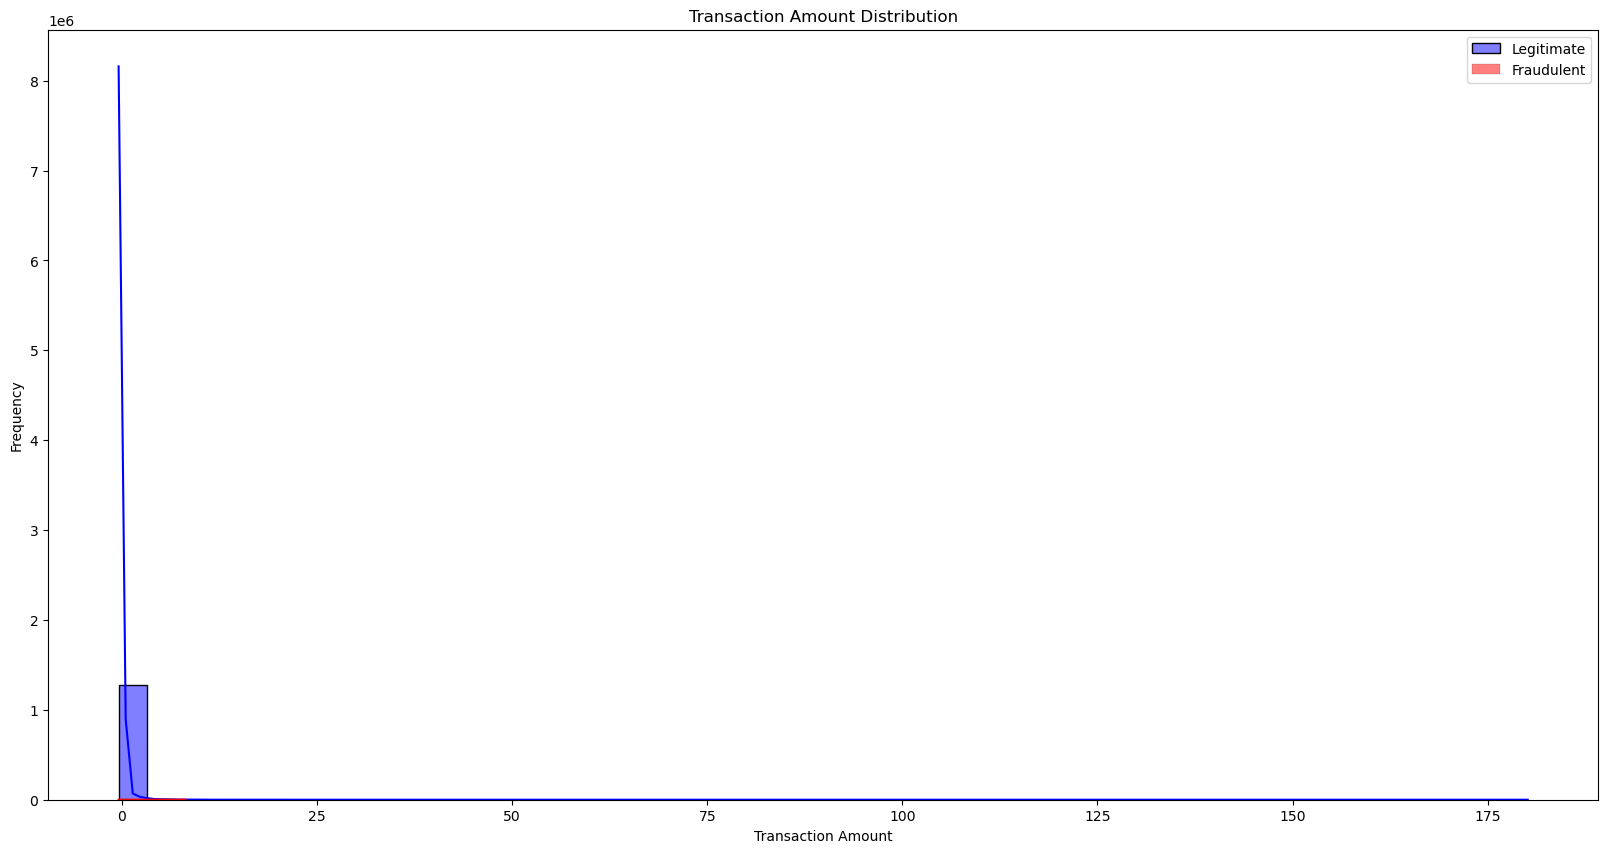

In [57]:
plt.figure(figsize=(20, 10))
sns.histplot(data[data['is_fraud'] == 0]['amt'], bins=50, kde=True, color='blue', label='Legitimate')
sns.histplot(data[data['is_fraud'] == 1]['amt'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

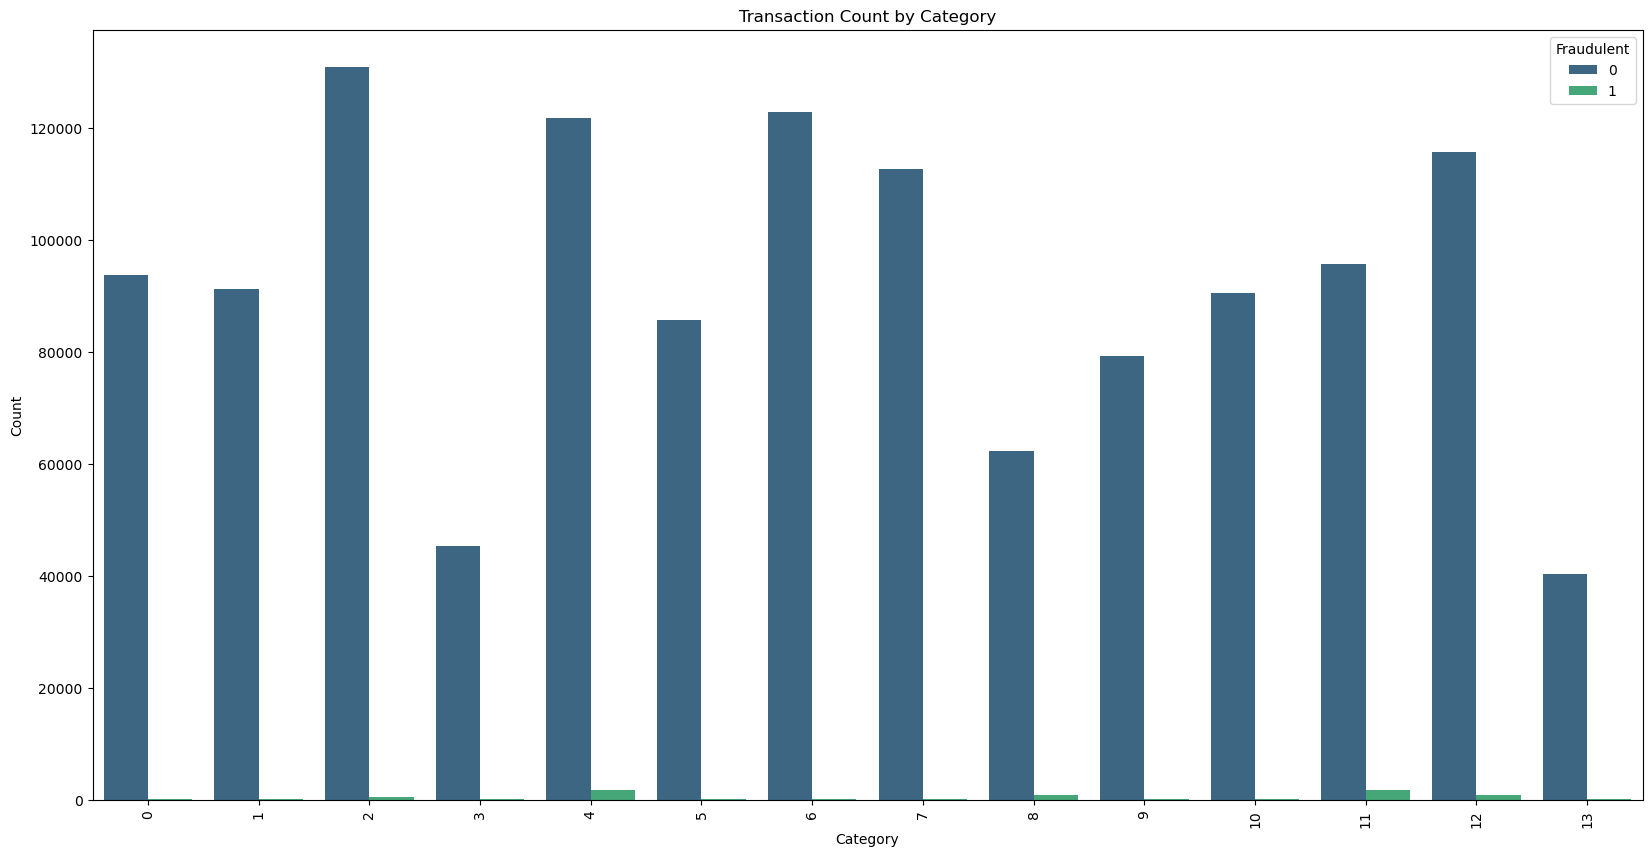

In [58]:
plt.figure(figsize=(20, 10))
sns.countplot(x='category', hue='is_fraud', data=data, palette='viridis')
plt.title('Transaction Count by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()


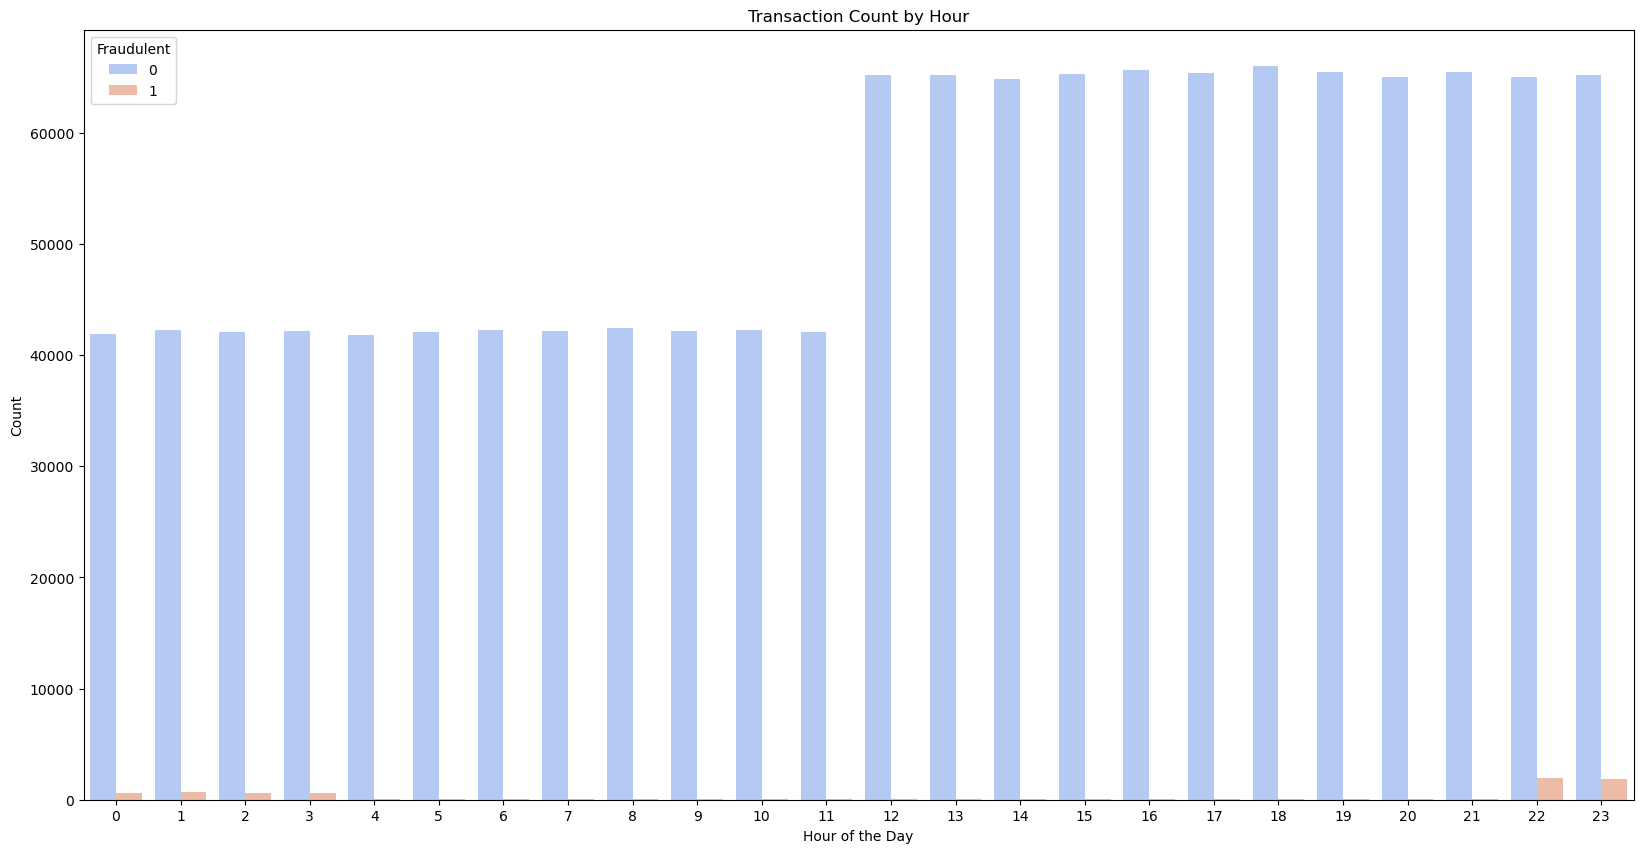

In [59]:
plt.figure(figsize=(20, 10))
sns.countplot(x='hour', hue='is_fraud', data=data, palette='coolwarm')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()


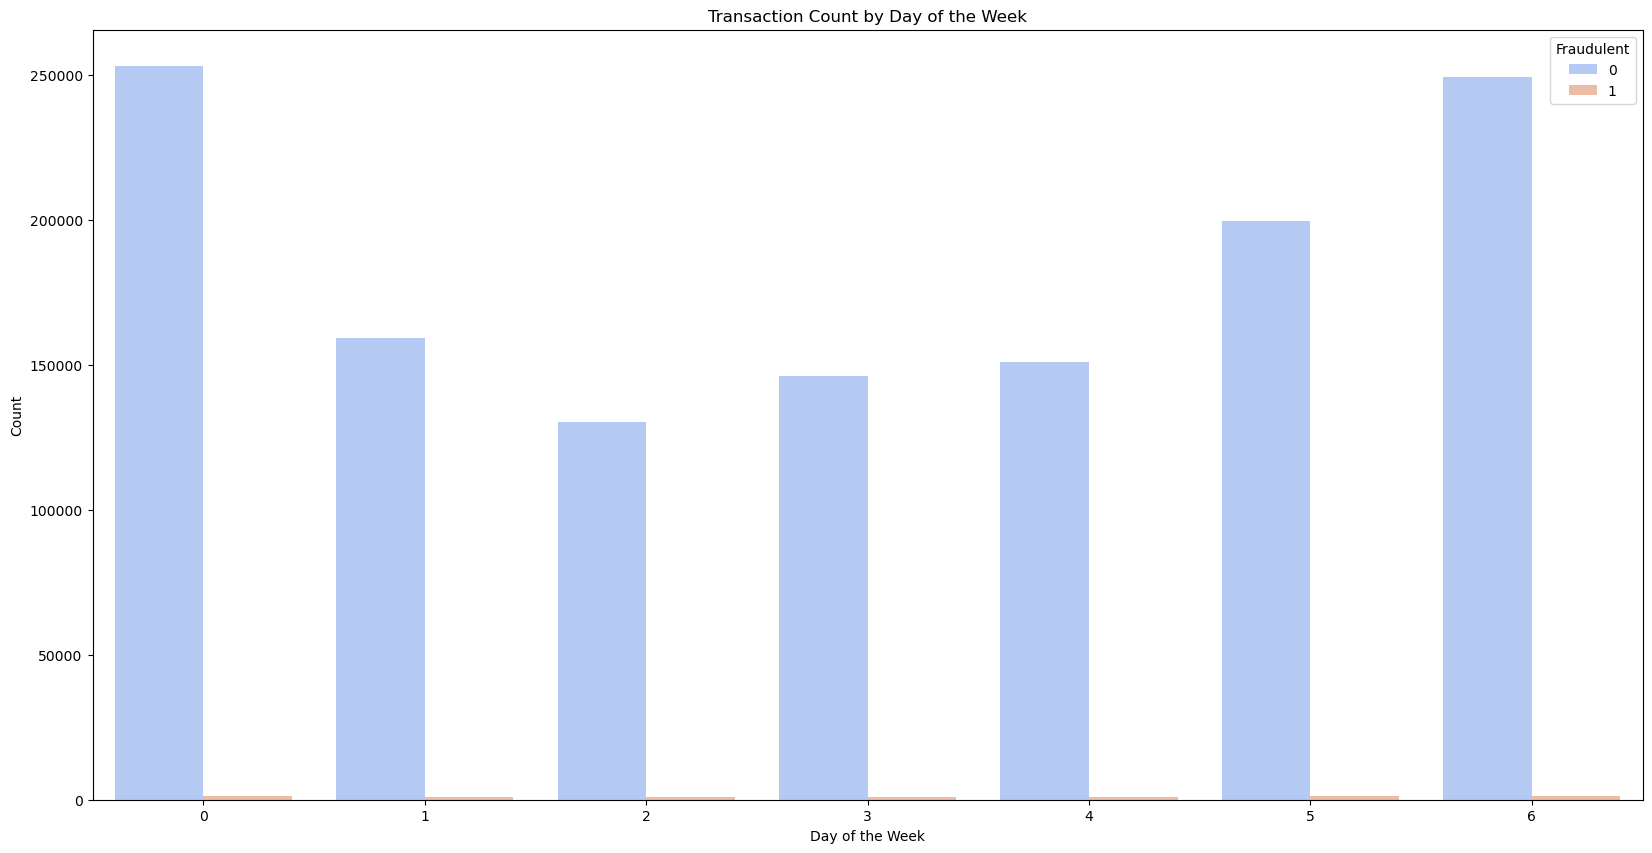

In [60]:
plt.figure(figsize=(20, 10))
sns.countplot(x='day_of_week', hue='is_fraud', data=data, palette='coolwarm')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()

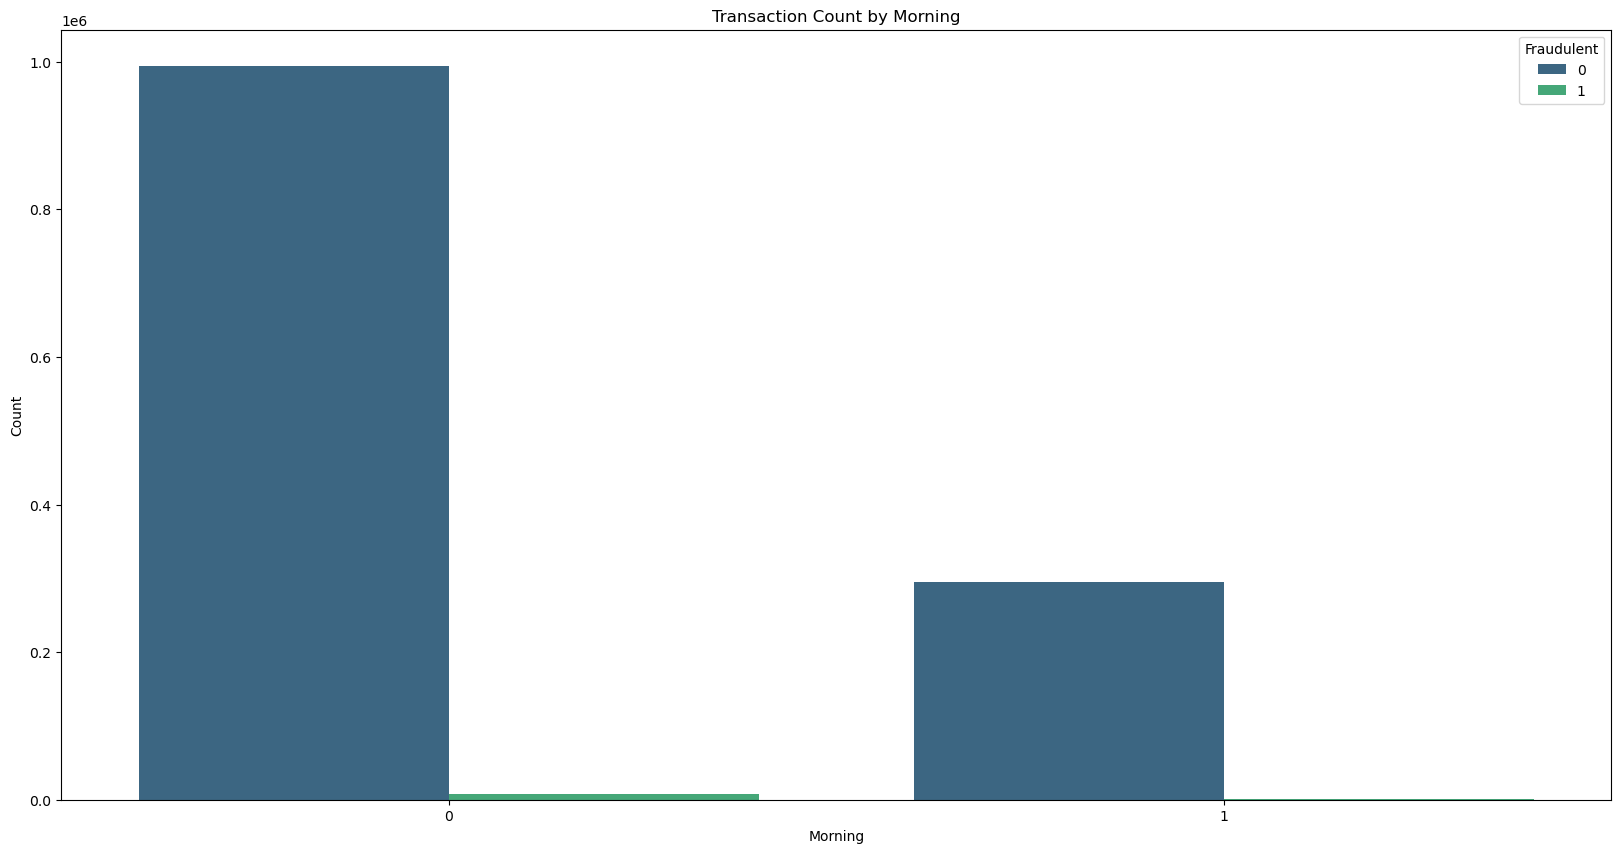

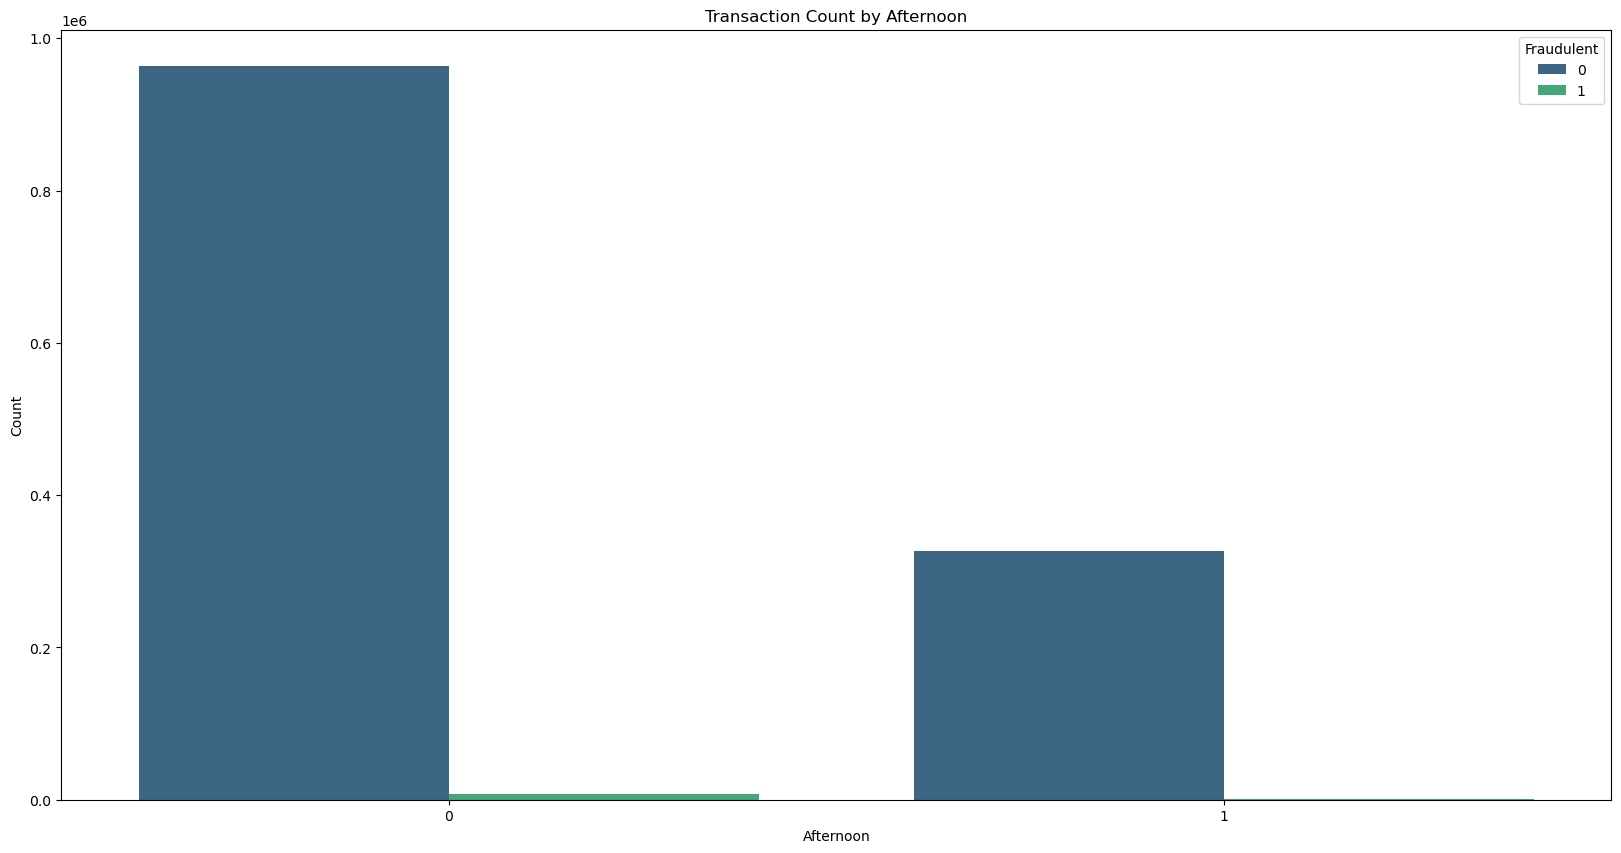

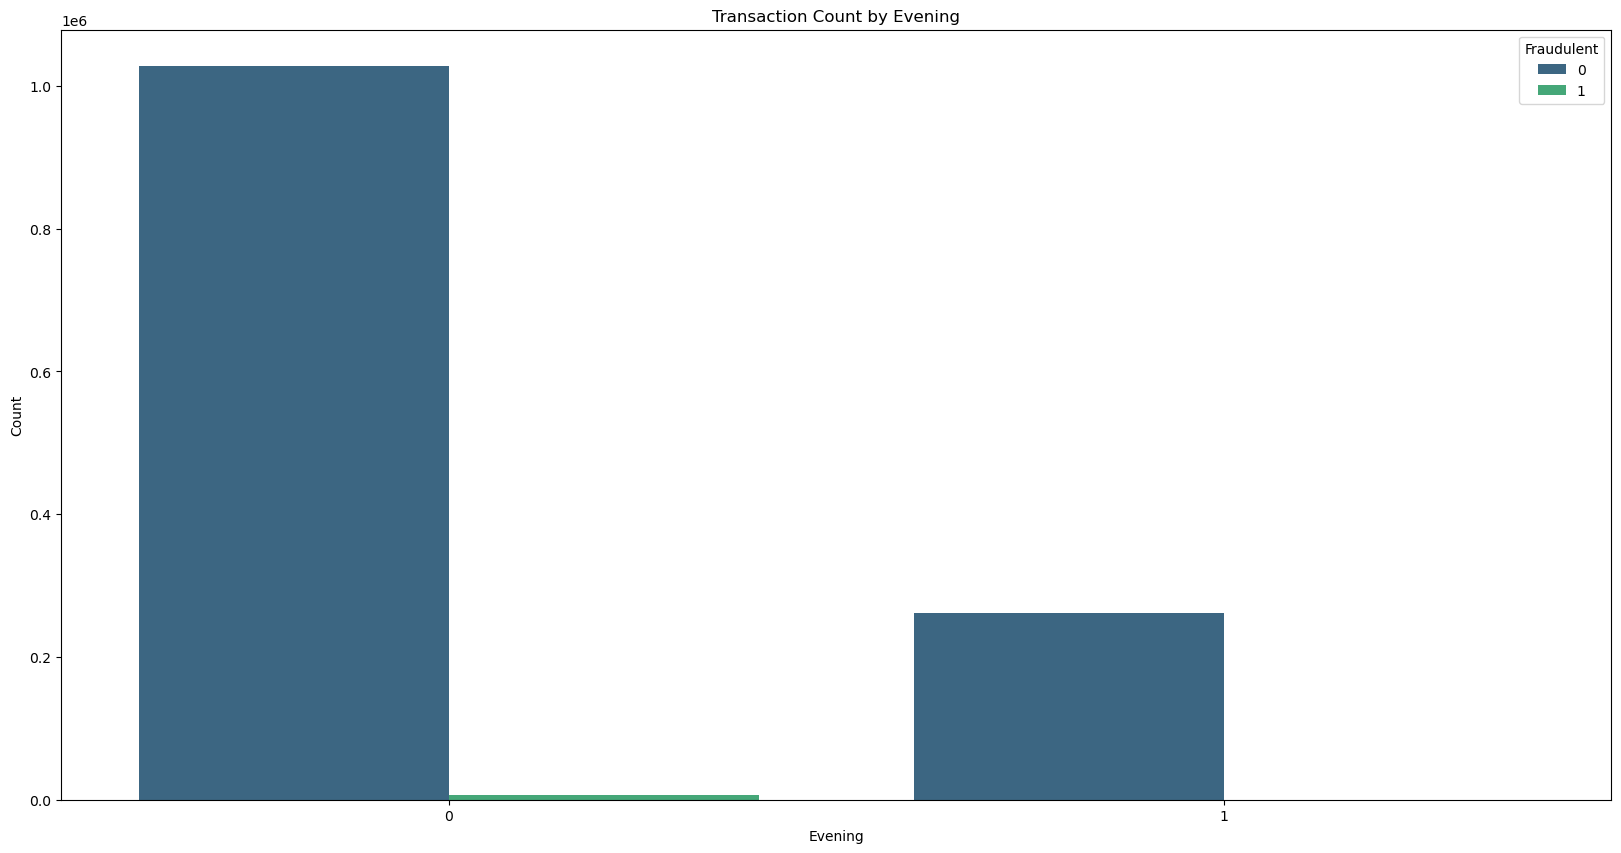

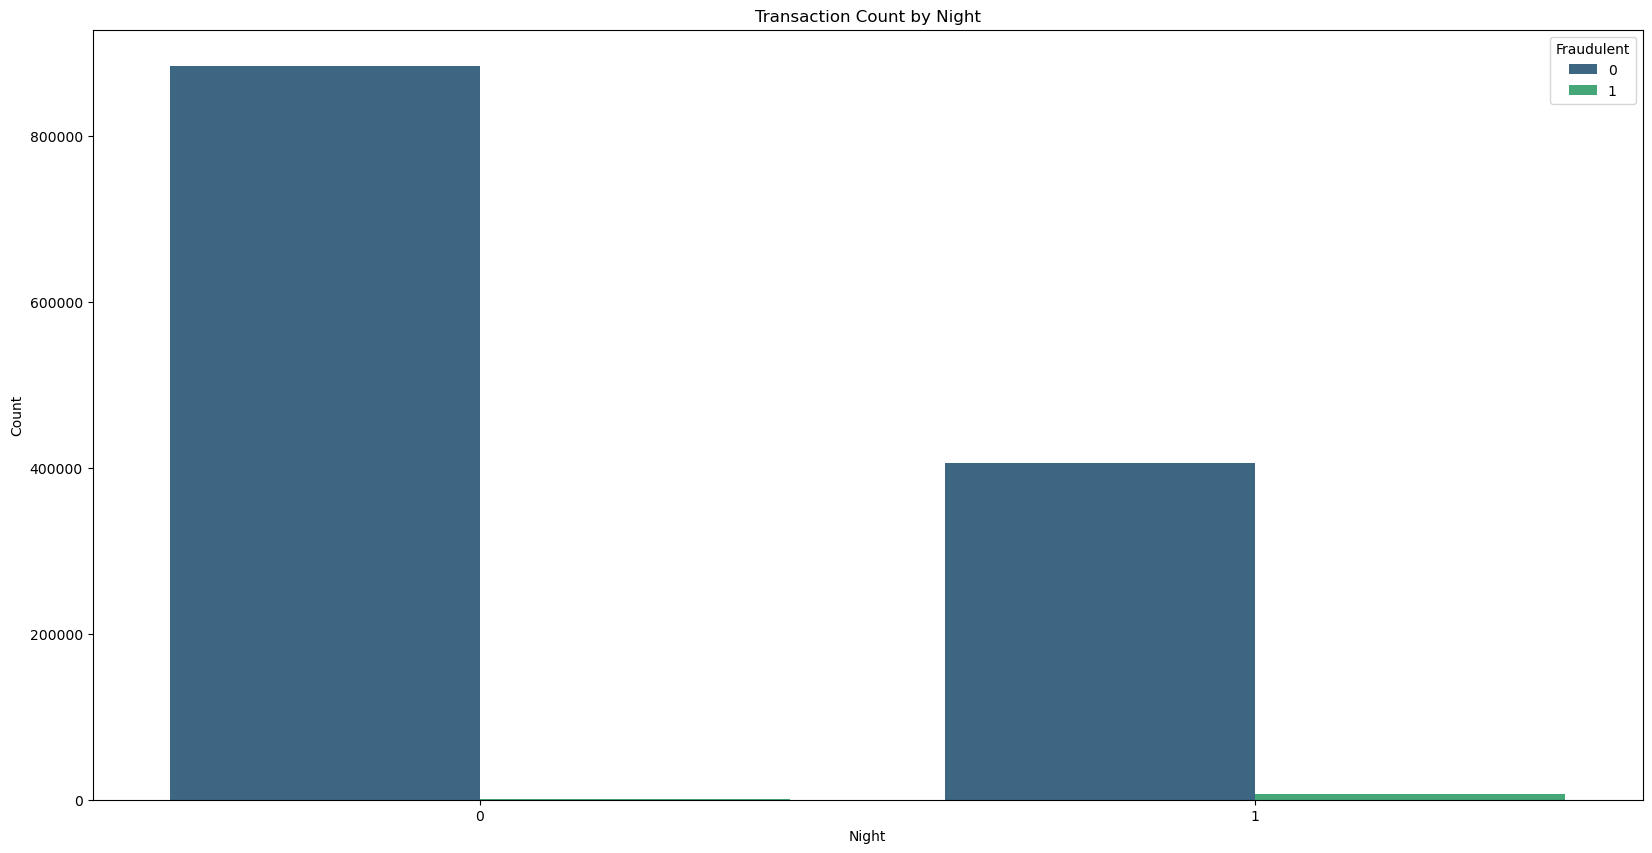

In [61]:
parts_of_day = ['part_of_day_morning', 'part_of_day_afternoon', 'part_of_day_evening', 'part_of_day_night']
for part in parts_of_day:
    plt.figure(figsize=(20, 10))
    sns.countplot(x=part, hue='is_fraud', data=data, palette='viridis')
    plt.title(f'Transaction Count by {part.split("_")[-1].capitalize()}')
    plt.xlabel(part.split("_")[-1].capitalize())
    plt.ylabel('Count')
    plt.legend(title='Fraudulent')
    plt.show()


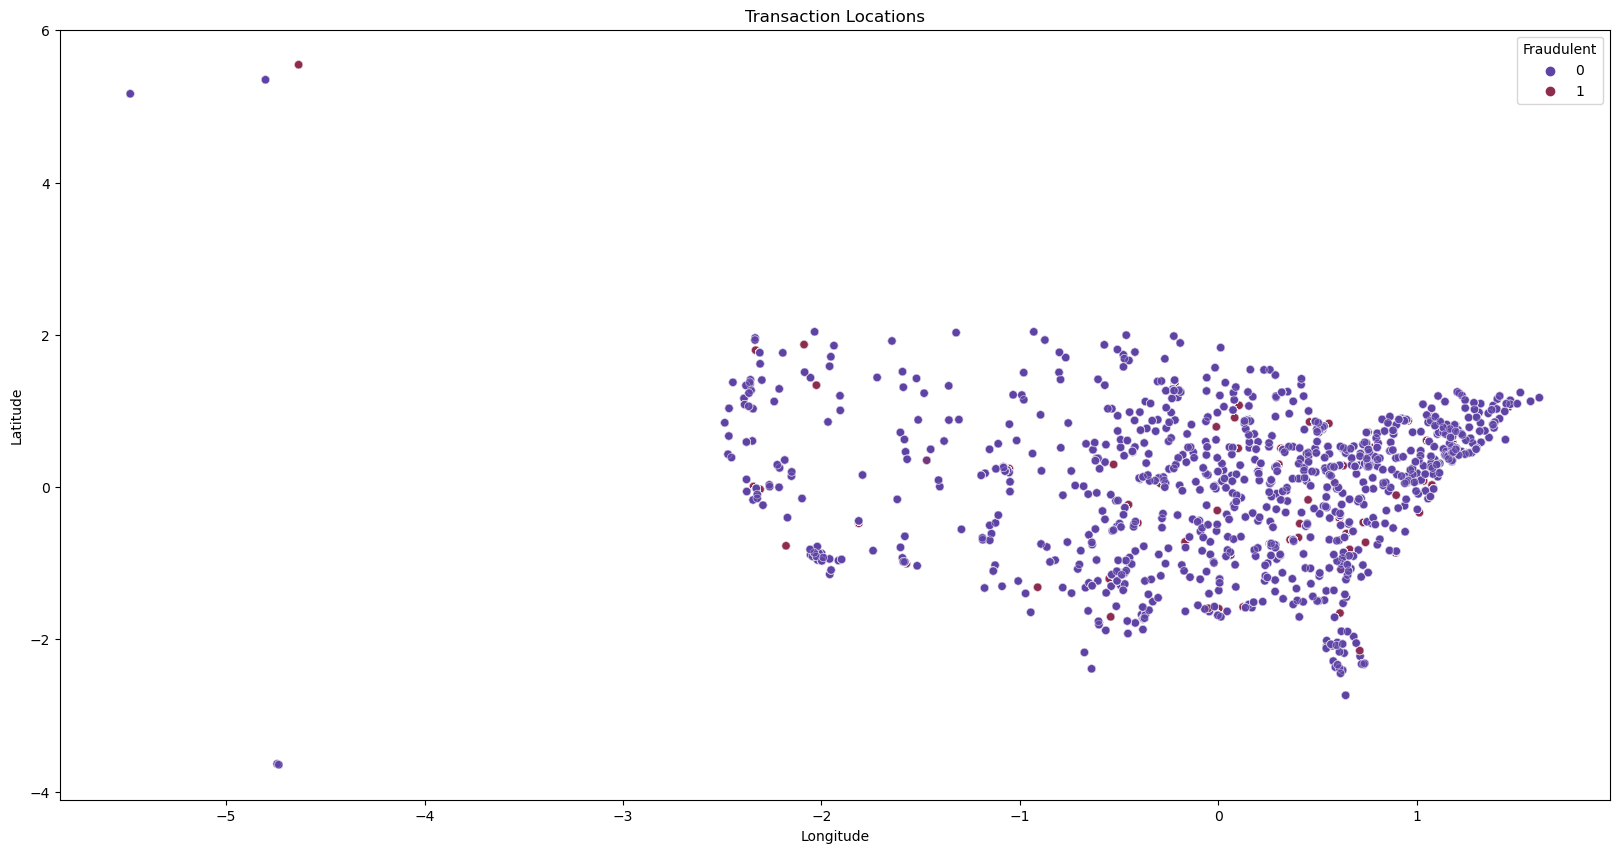

In [62]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=data, palette='twilight', alpha=0.5)
plt.title('Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraudulent')
plt.show()

**Outlier Detection for Train set:**

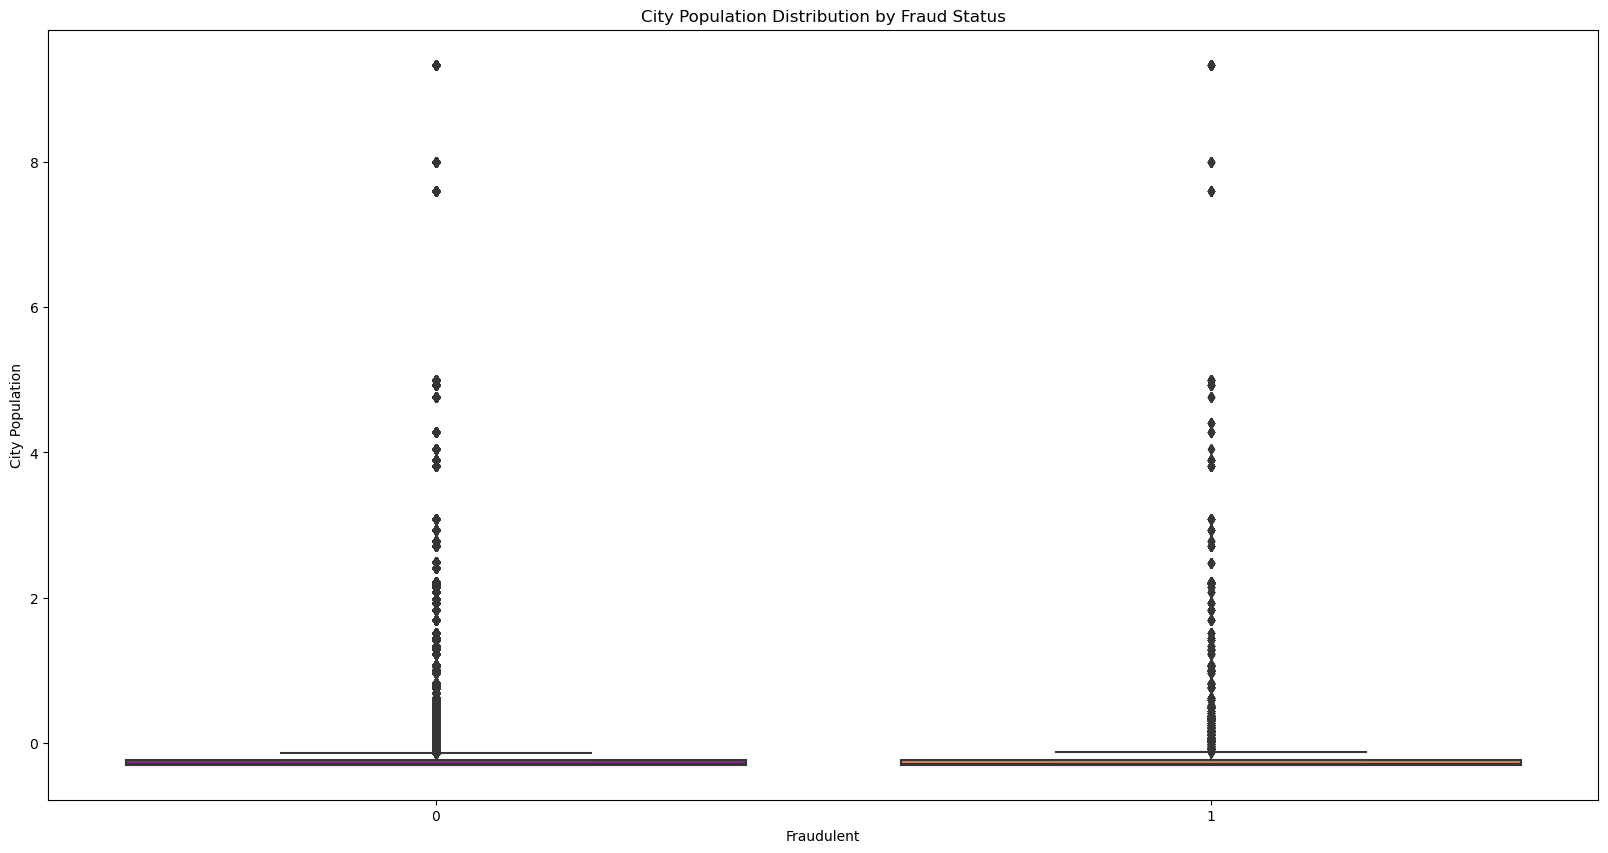

In [63]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='is_fraud', y='city_pop', data=data, palette='plasma')
plt.title('City Population Distribution by Fraud Status')
plt.xlabel('Fraudulent')
plt.ylabel('City Population')
plt.show()

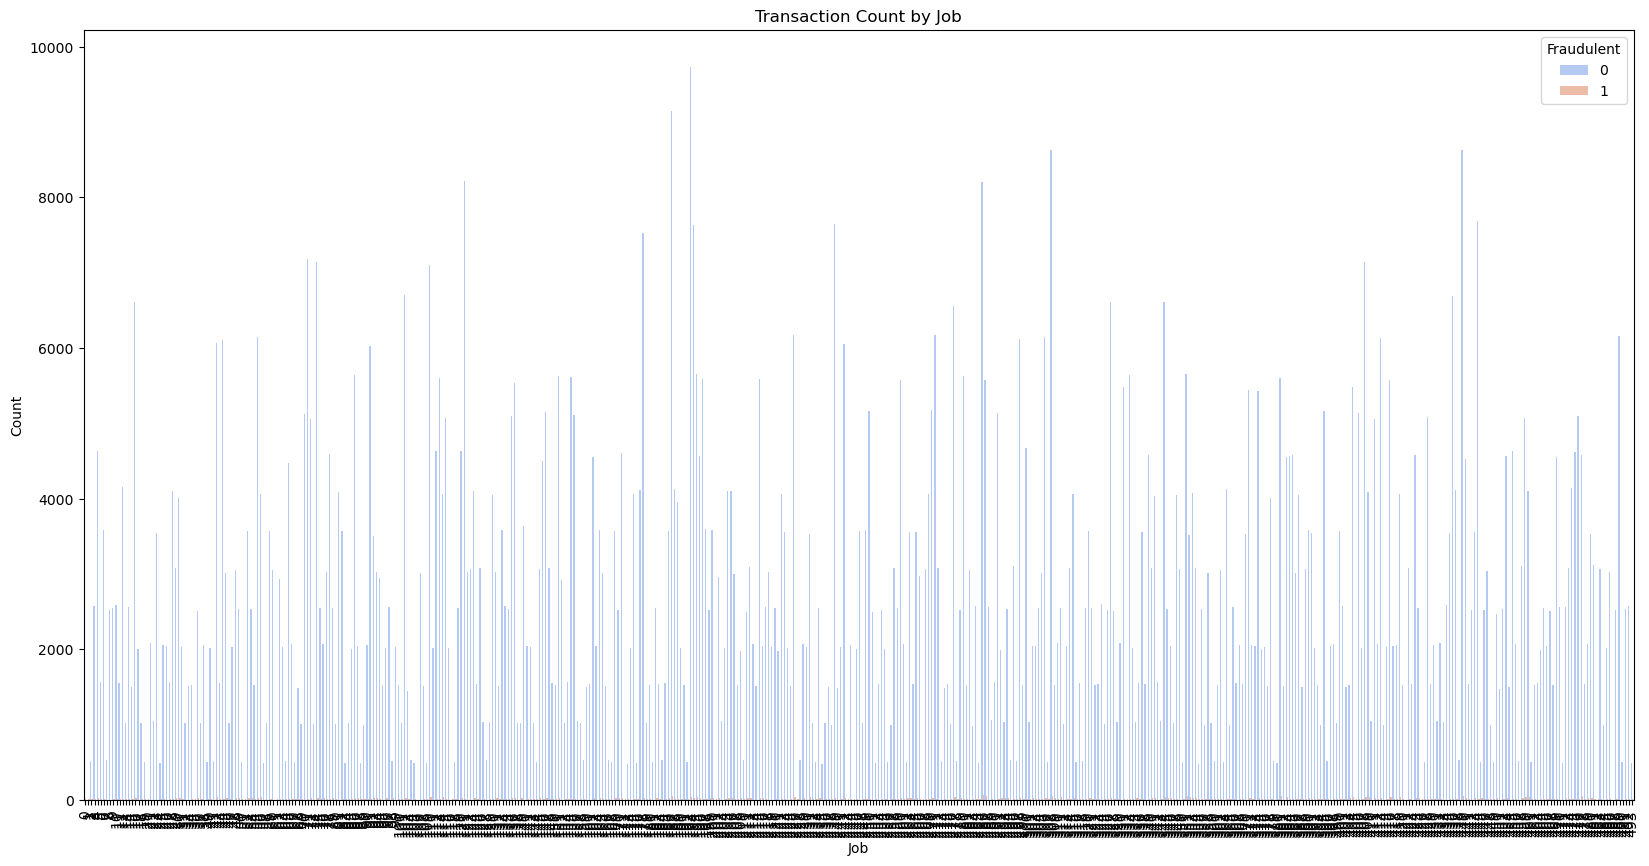

In [64]:
plt.figure(figsize=(20, 10))
sns.countplot(x='job', hue='is_fraud', data=data, palette='coolwarm')
plt.title('Transaction Count by Job')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()


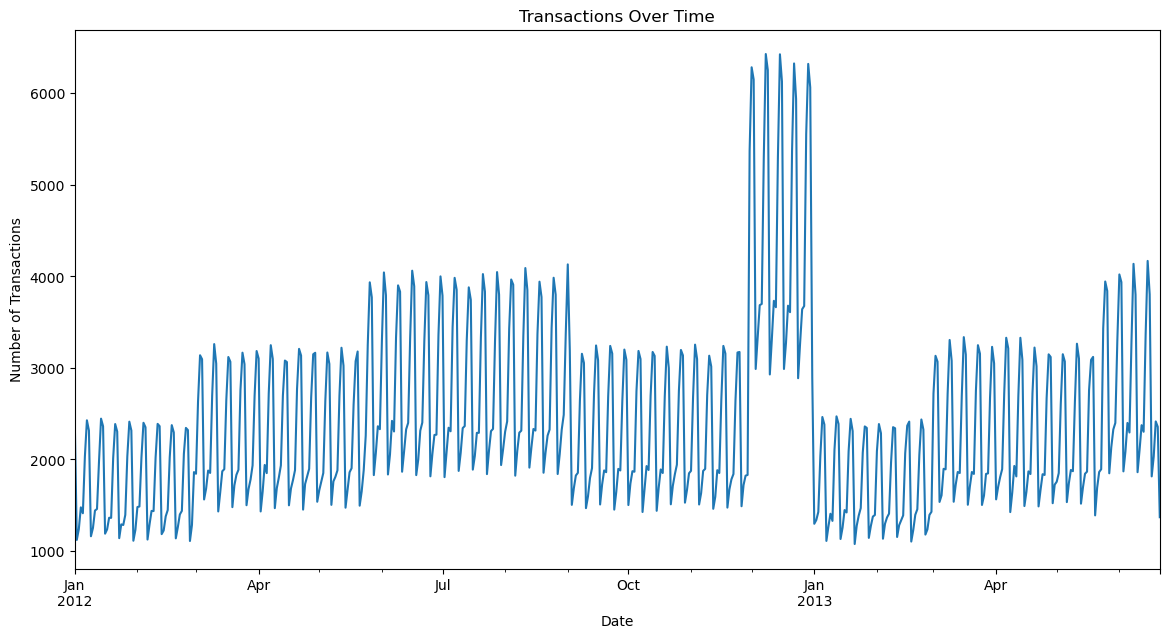

In [65]:
data['datetime'] = pd.to_datetime(data['unix_time'], unit='s')
data.set_index('datetime', inplace=True)
data.resample('D').size().plot(figsize=(14, 7), title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


**EDA for test set:**

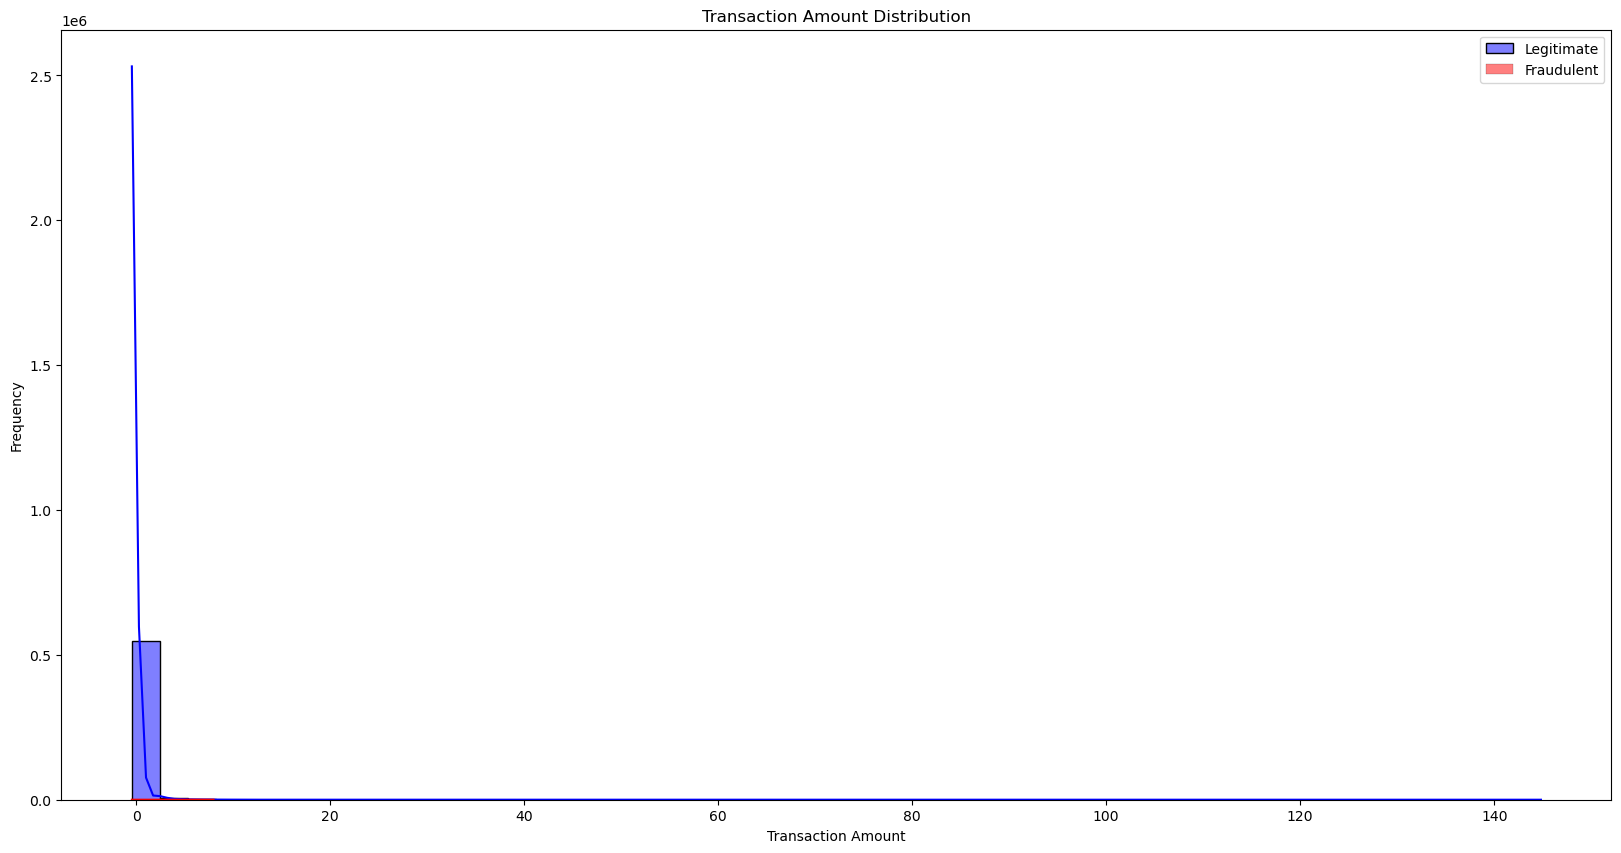

In [66]:
plt.figure(figsize=(20, 10))
sns.histplot(test[test['is_fraud'] == 0]['amt'], bins=50, kde=True, color='blue', label='Legitimate')
sns.histplot(test[test['is_fraud'] == 1]['amt'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

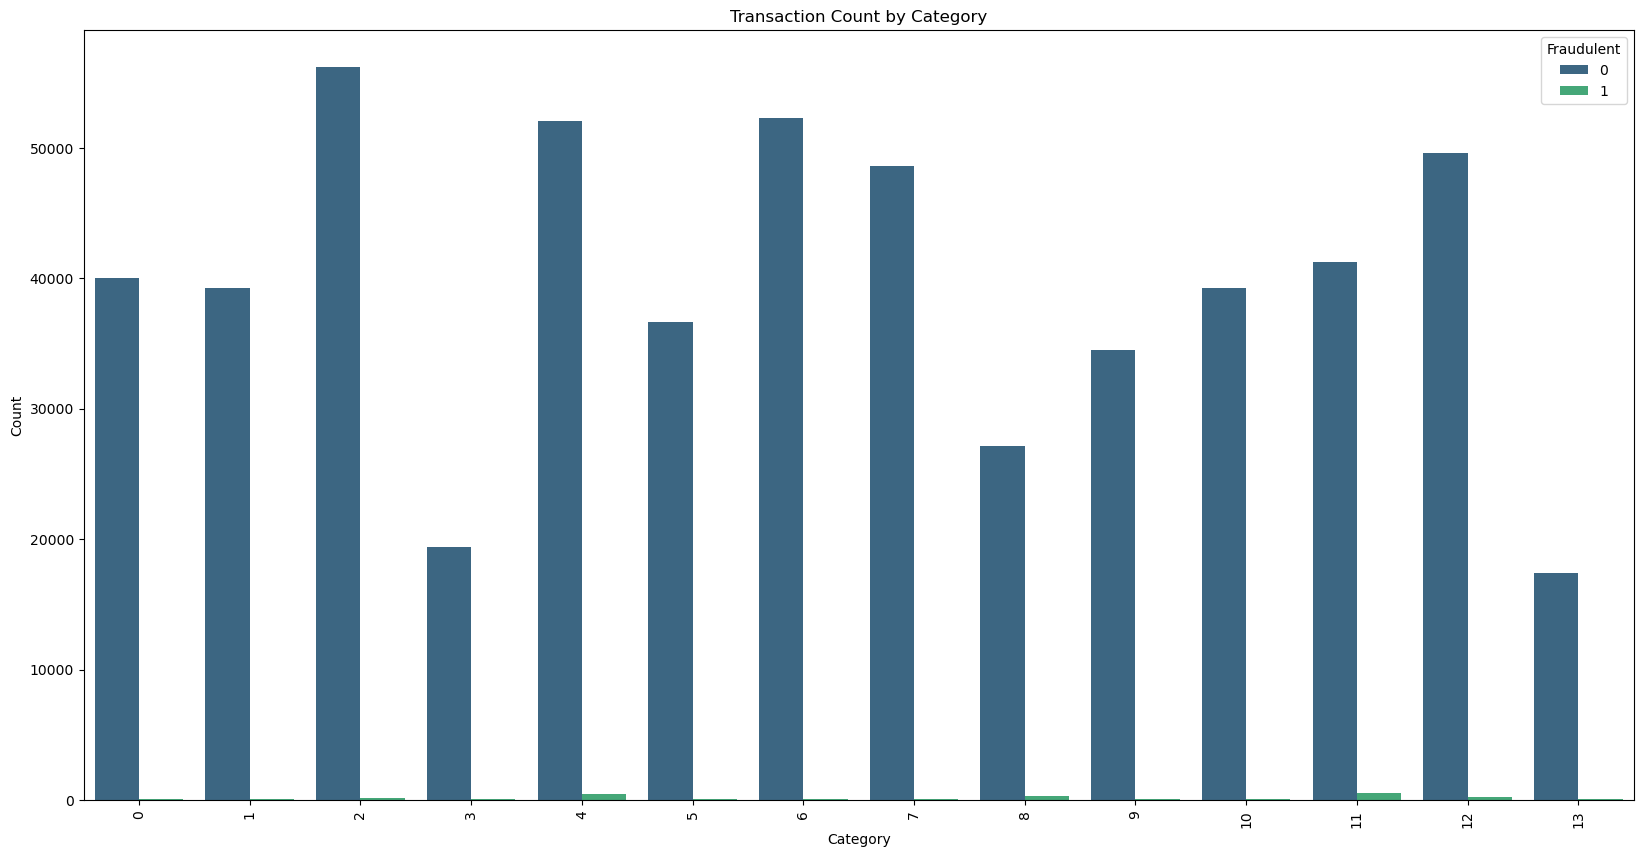

In [67]:
plt.figure(figsize=(20, 10))
sns.countplot(x='category', hue='is_fraud', data=test, palette='viridis')
plt.title('Transaction Count by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()


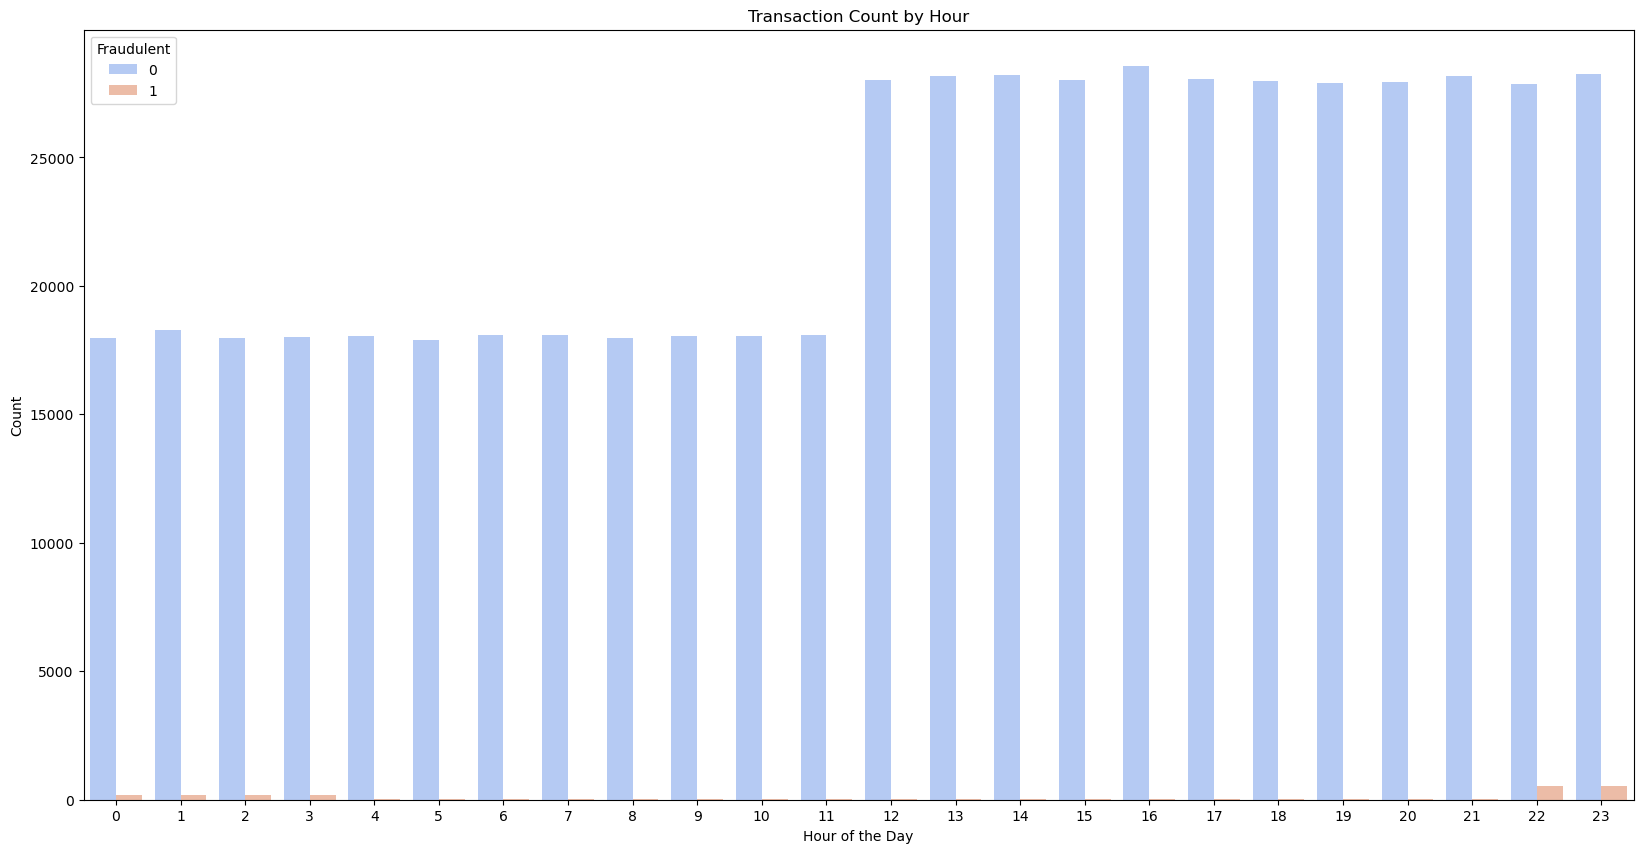

In [68]:
plt.figure(figsize=(20, 10))
sns.countplot(x='hour', hue='is_fraud', data=test, palette='coolwarm')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()

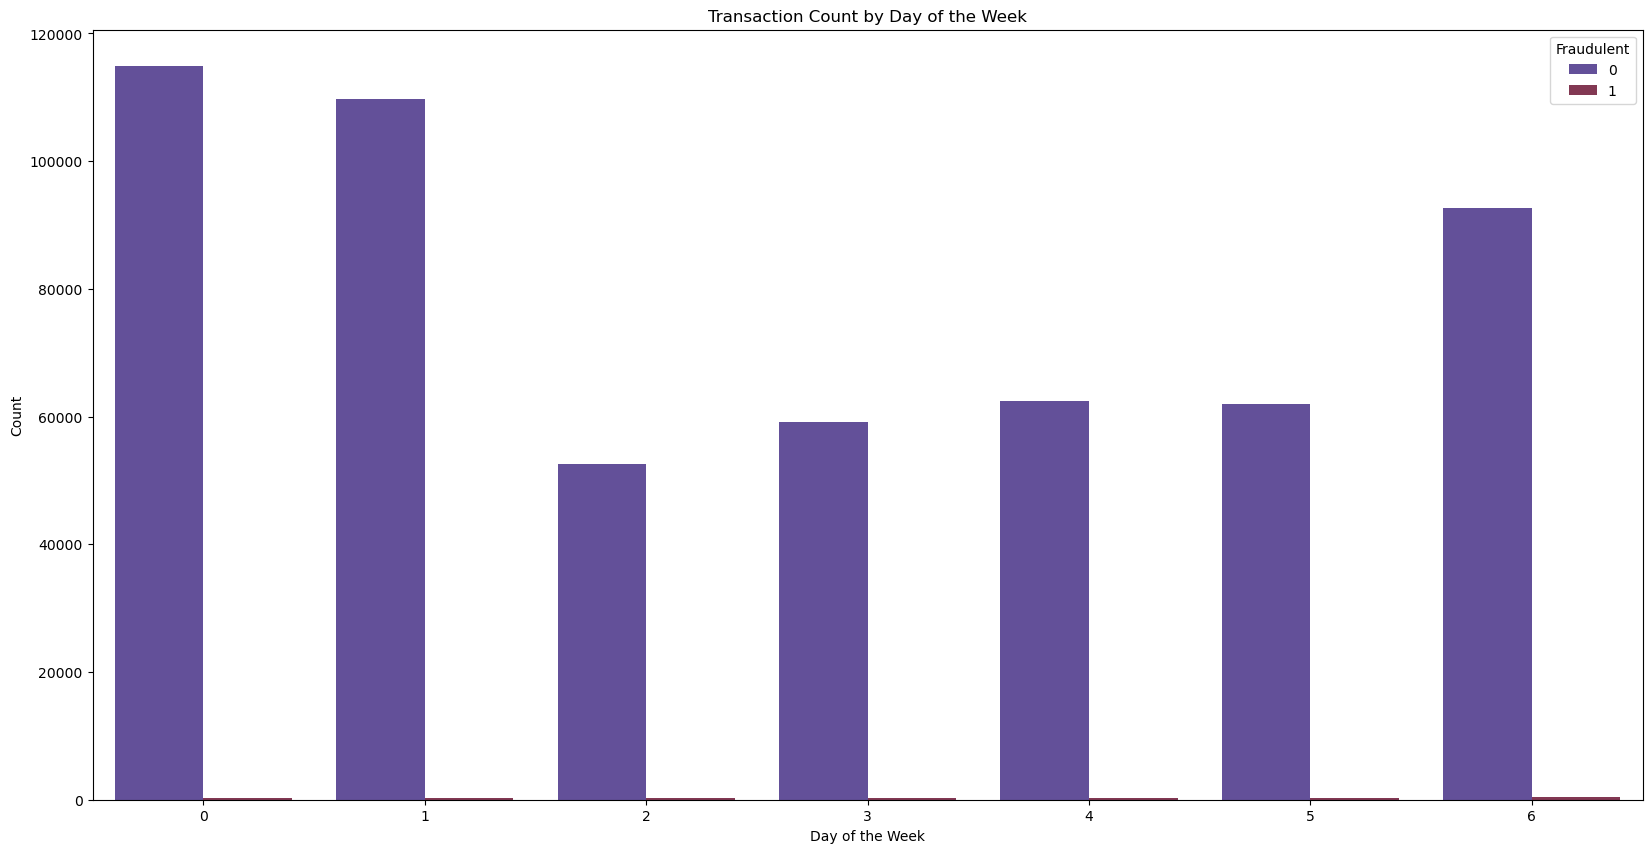

In [69]:
plt.figure(figsize=(20, 10))
sns.countplot(x='day_of_week', hue='is_fraud', data=test, palette='twilight')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()

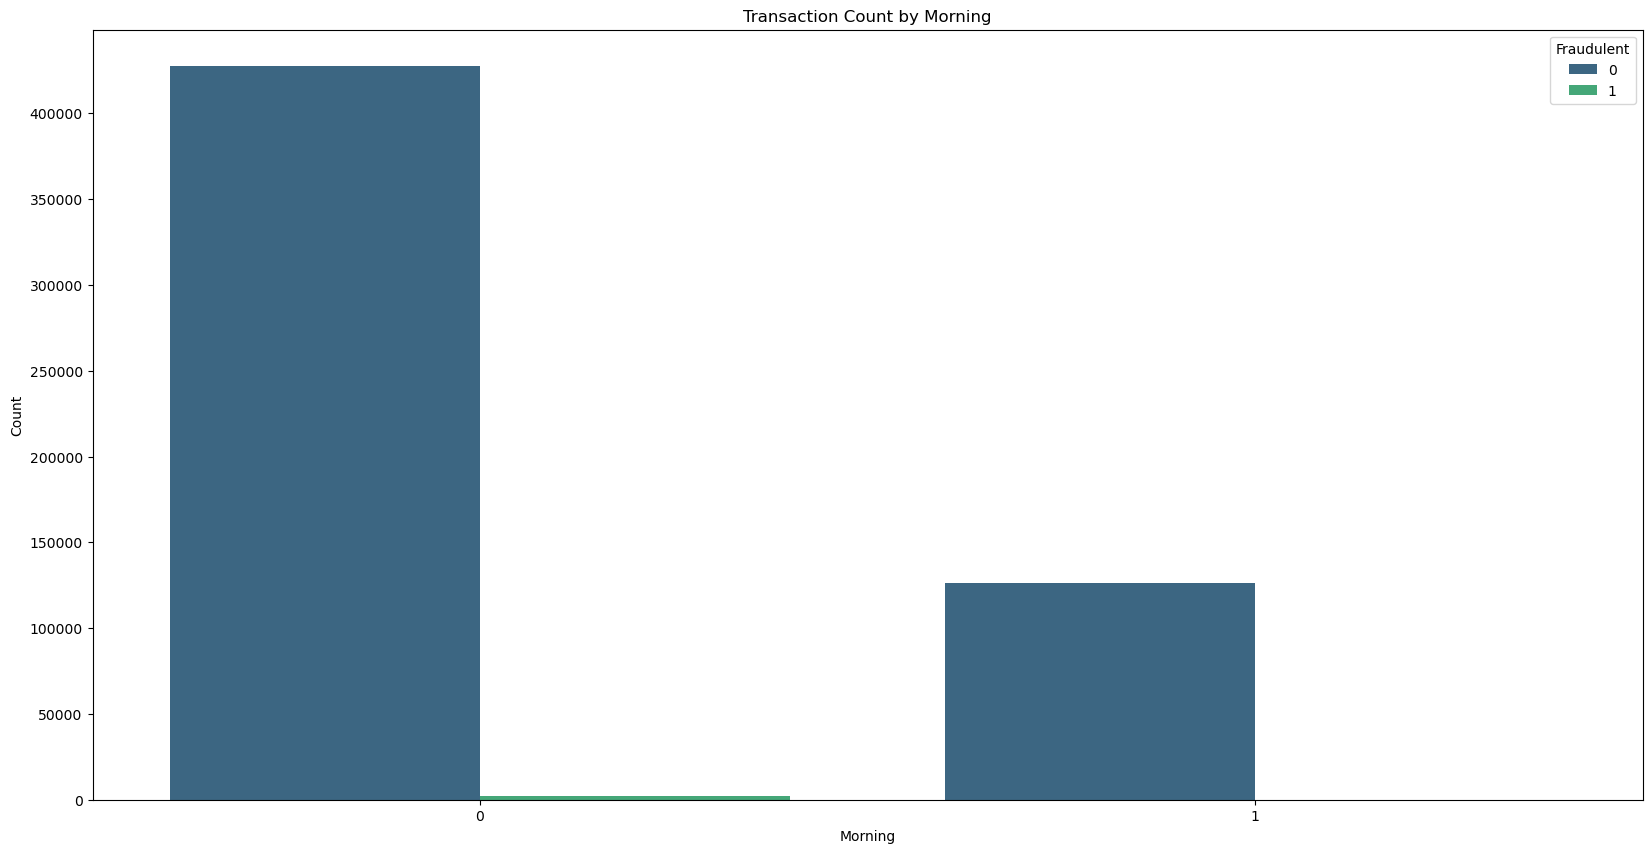

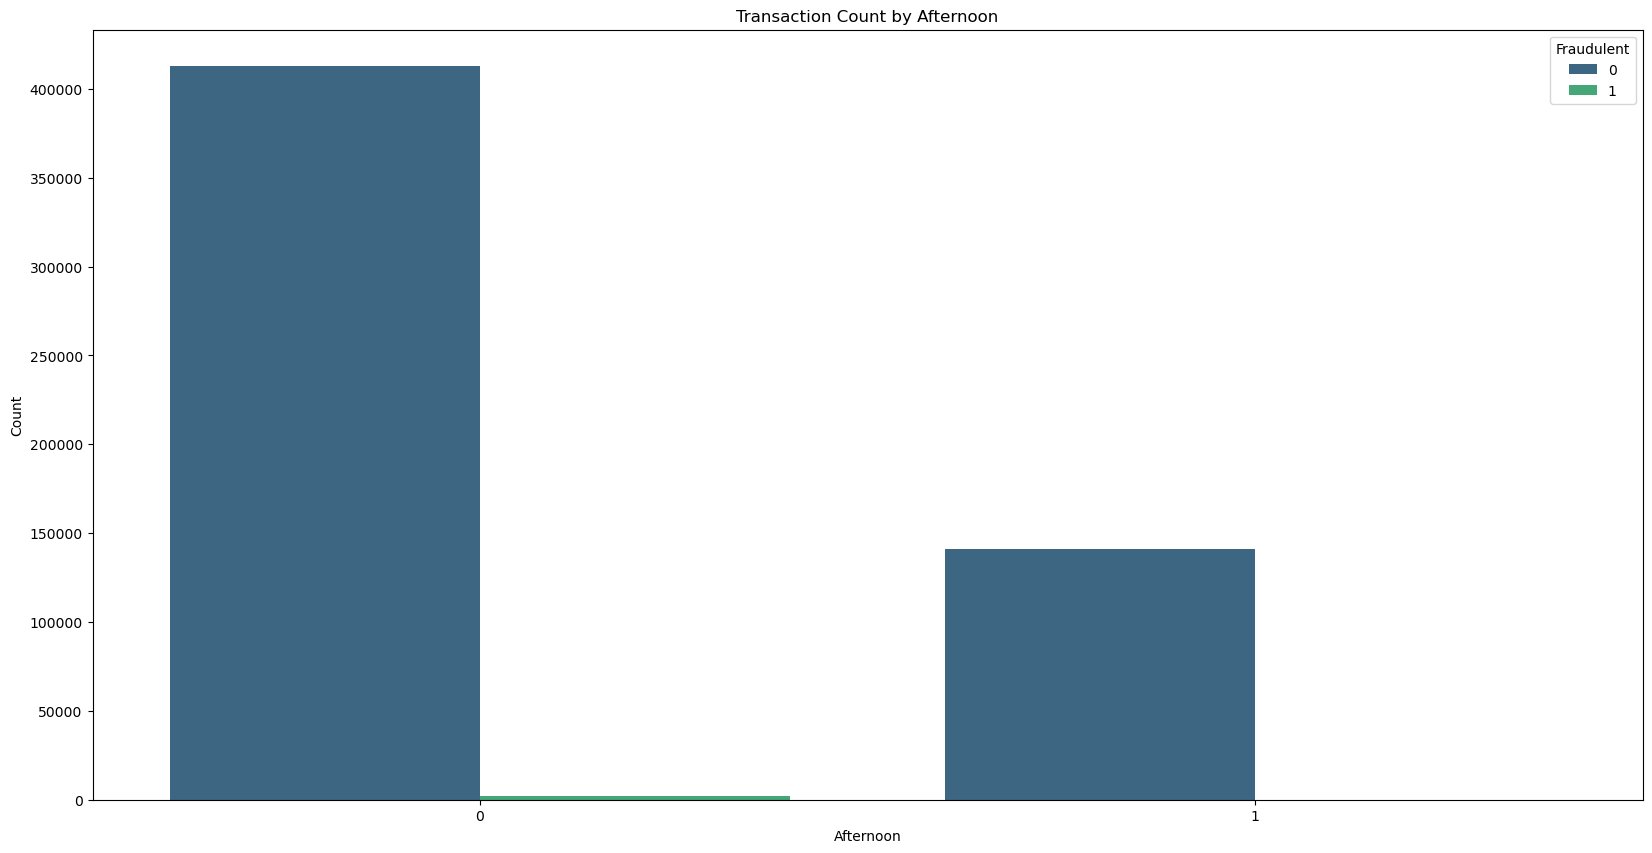

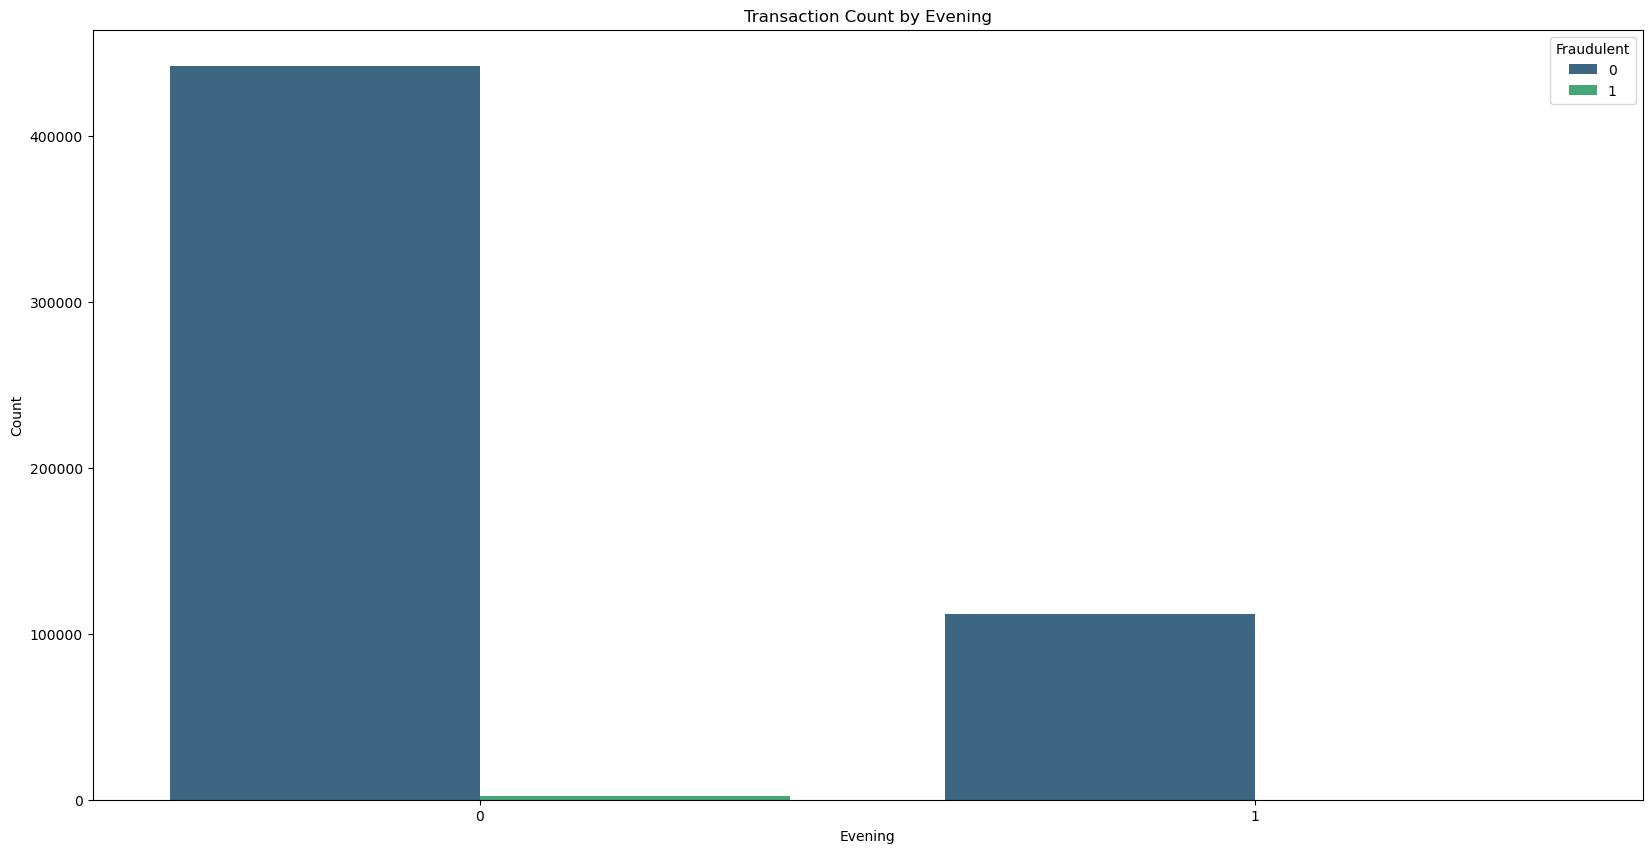

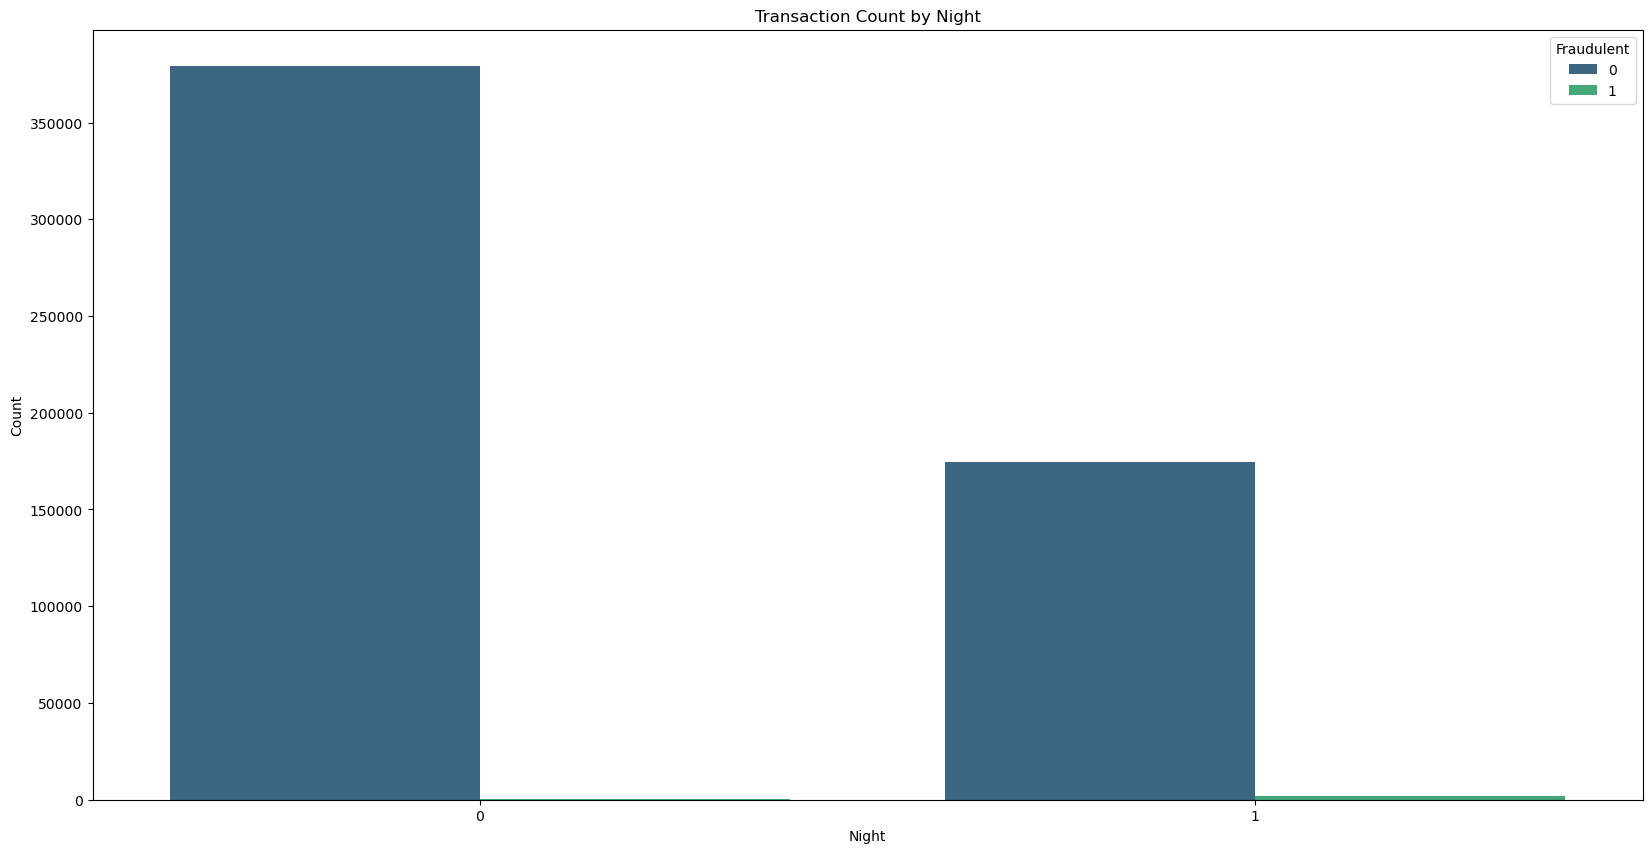

In [70]:
parts_of_day = ['part_of_day_morning', 'part_of_day_afternoon', 'part_of_day_evening', 'part_of_day_night']
for part in parts_of_day:
    plt.figure(figsize=(20, 10))
    sns.countplot(x=part, hue='is_fraud', data=test, palette='viridis')
    plt.title(f'Transaction Count by {part.split("_")[-1].capitalize()}')
    plt.xlabel(part.split("_")[-1].capitalize())
    plt.ylabel('Count')
    plt.legend(title='Fraudulent')
    plt.show()


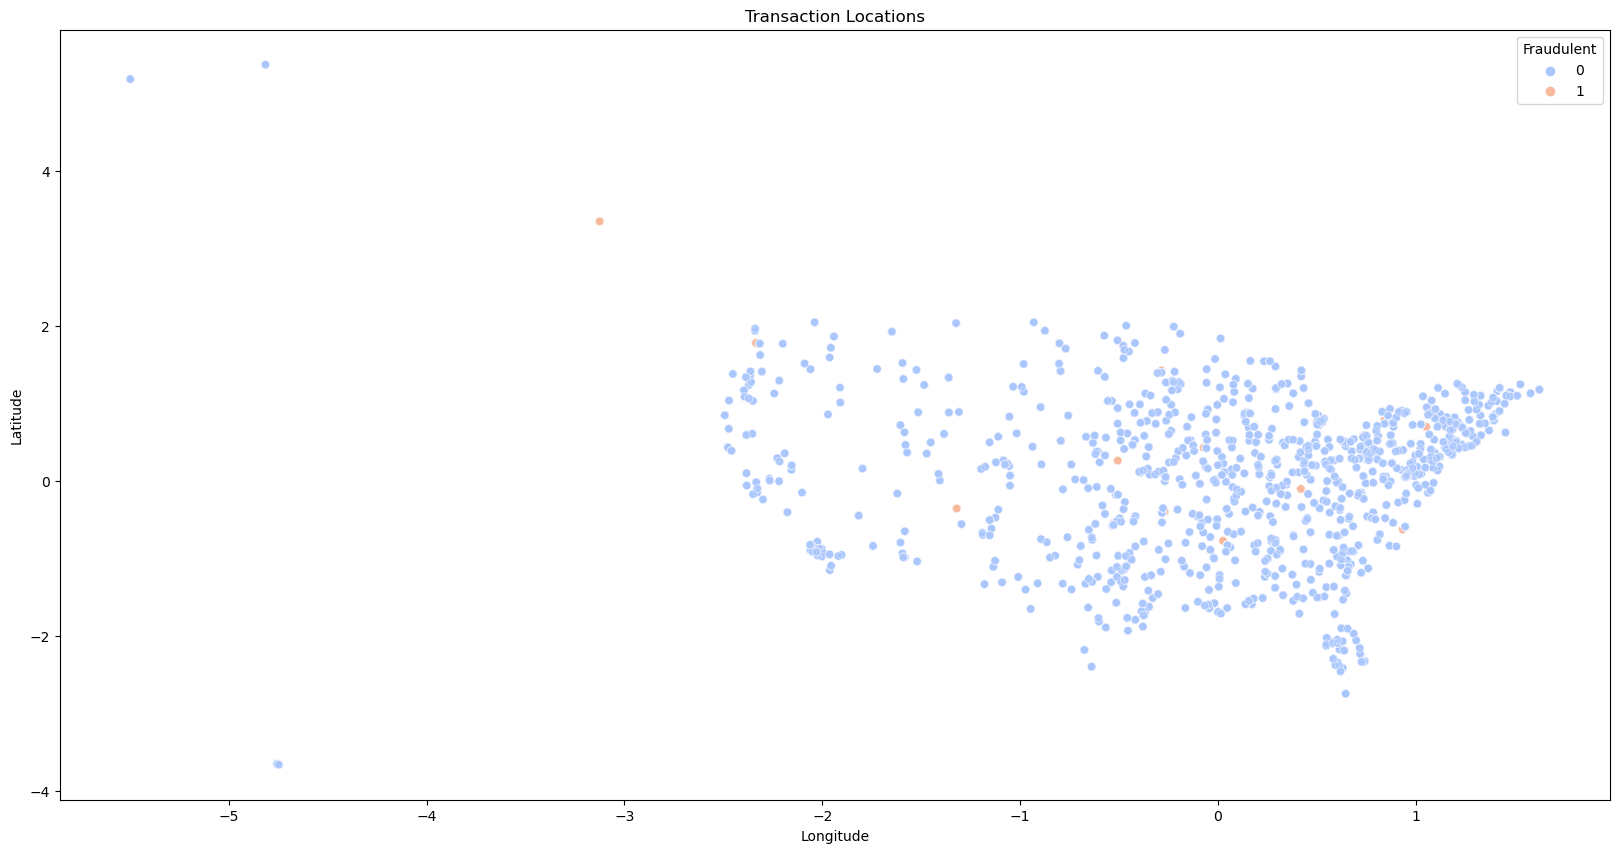

In [71]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=test, palette='coolwarm', alpha=0.5)
plt.title('Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraudulent')
plt.show()


**Outlier Detection for Test set:**

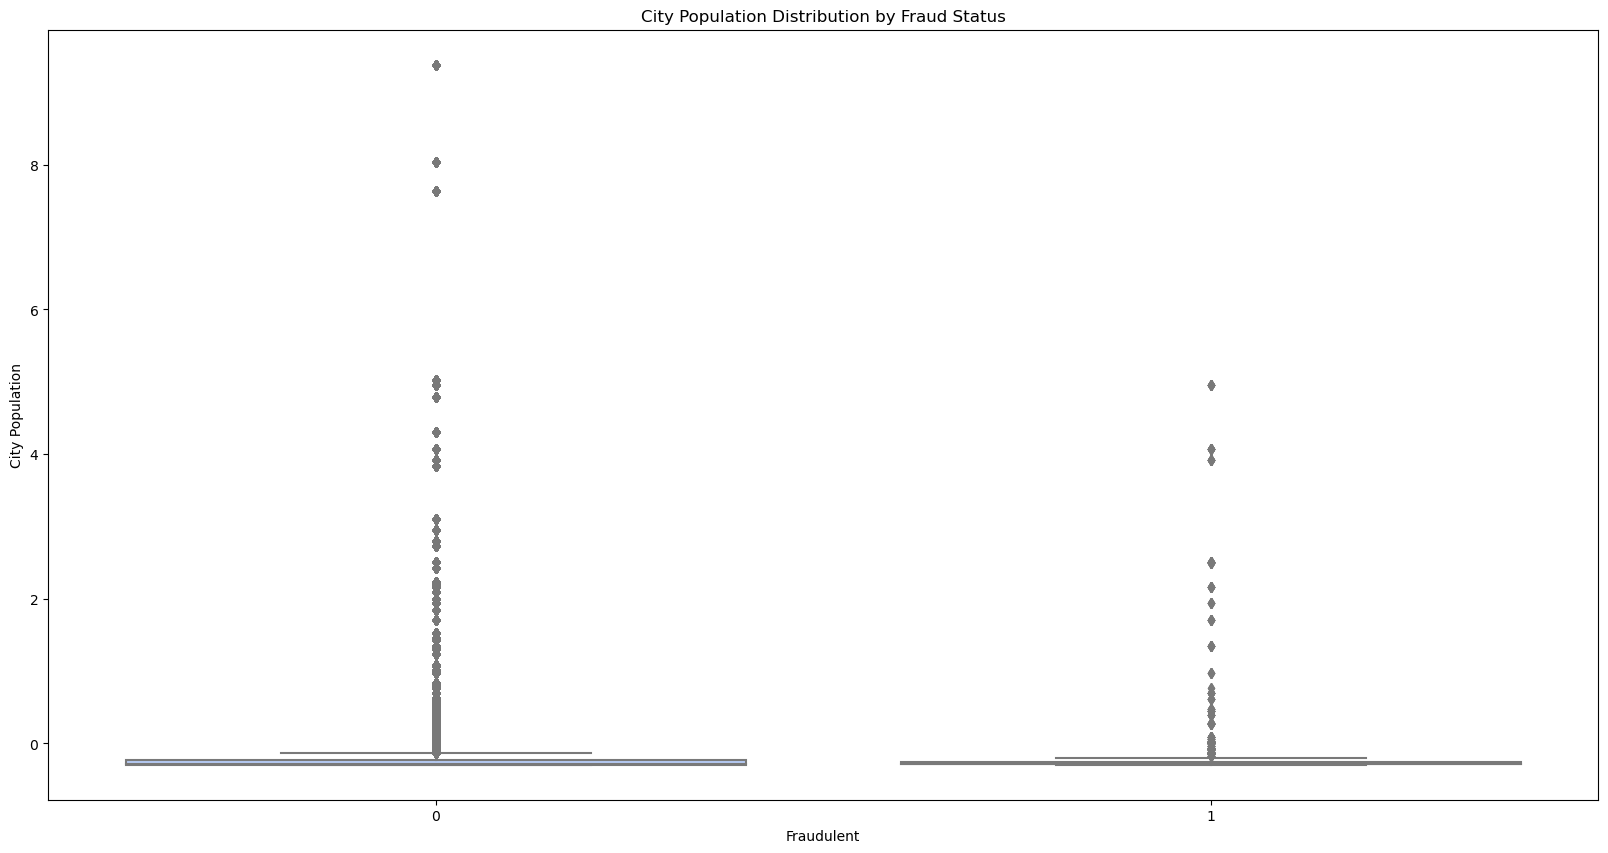

In [72]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='is_fraud', y='city_pop', data=test, palette='coolwarm')
plt.title('City Population Distribution by Fraud Status')
plt.xlabel('Fraudulent')
plt.ylabel('City Population')
plt.show()


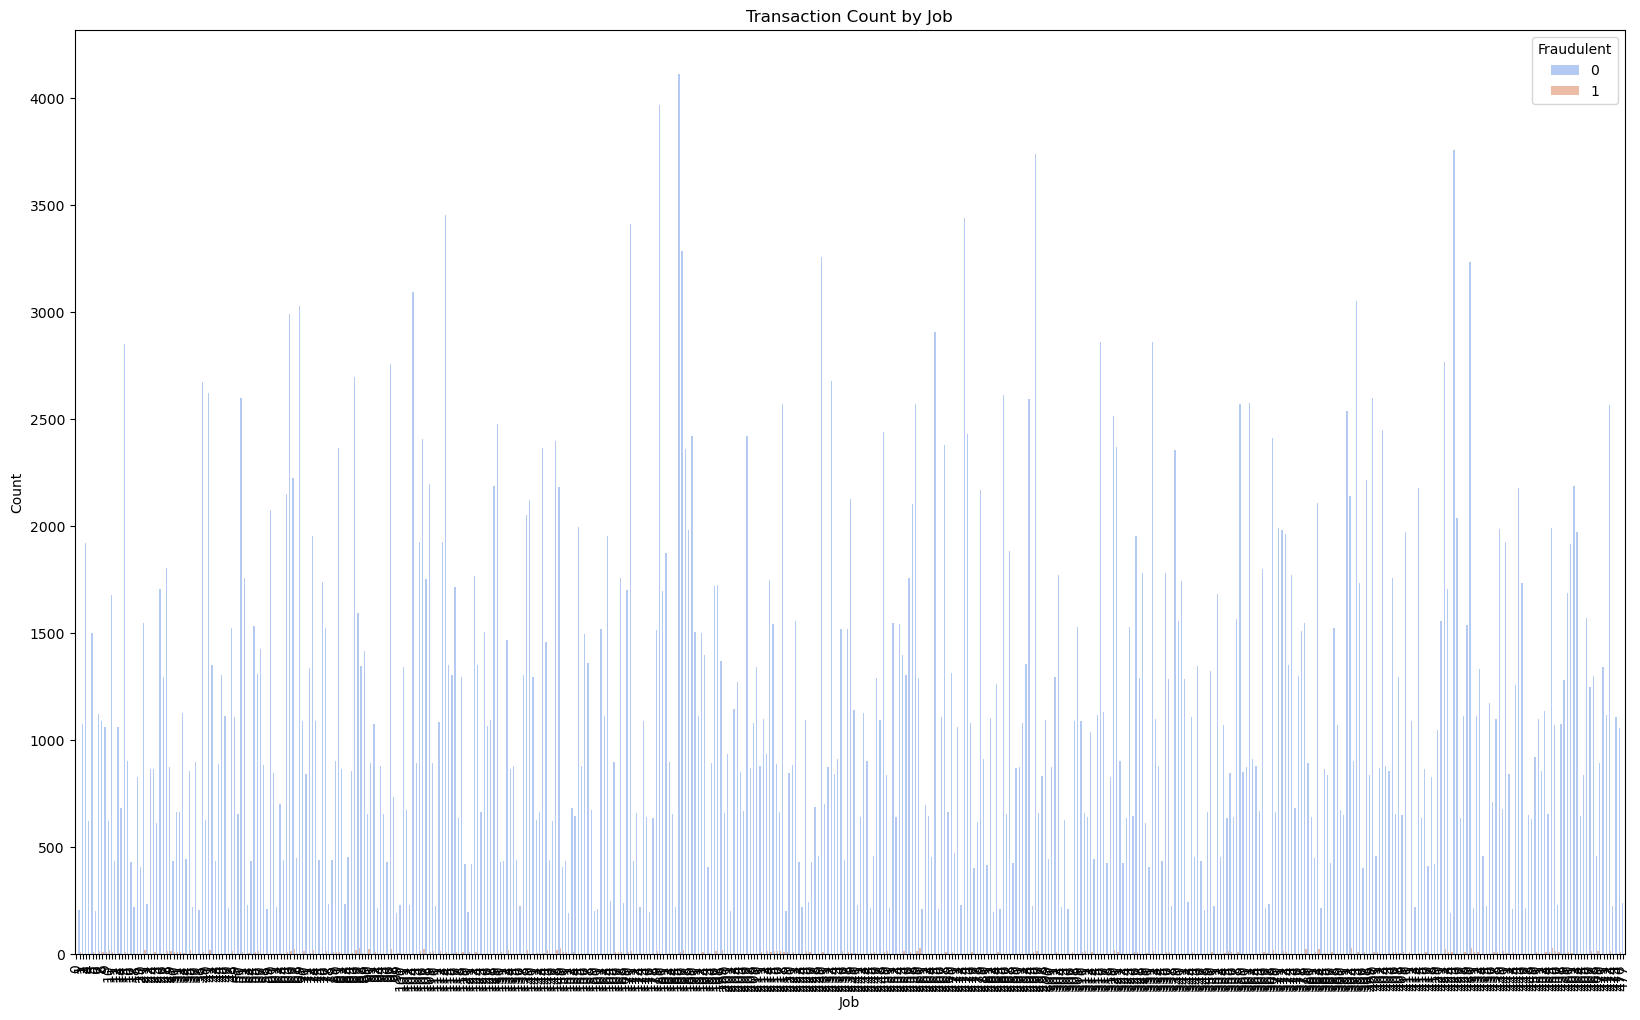

In [73]:
plt.figure(figsize=(20, 12))
sns.countplot(x='job', hue='is_fraud', data=test, palette='coolwarm')
plt.title('Transaction Count by Job')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.show()


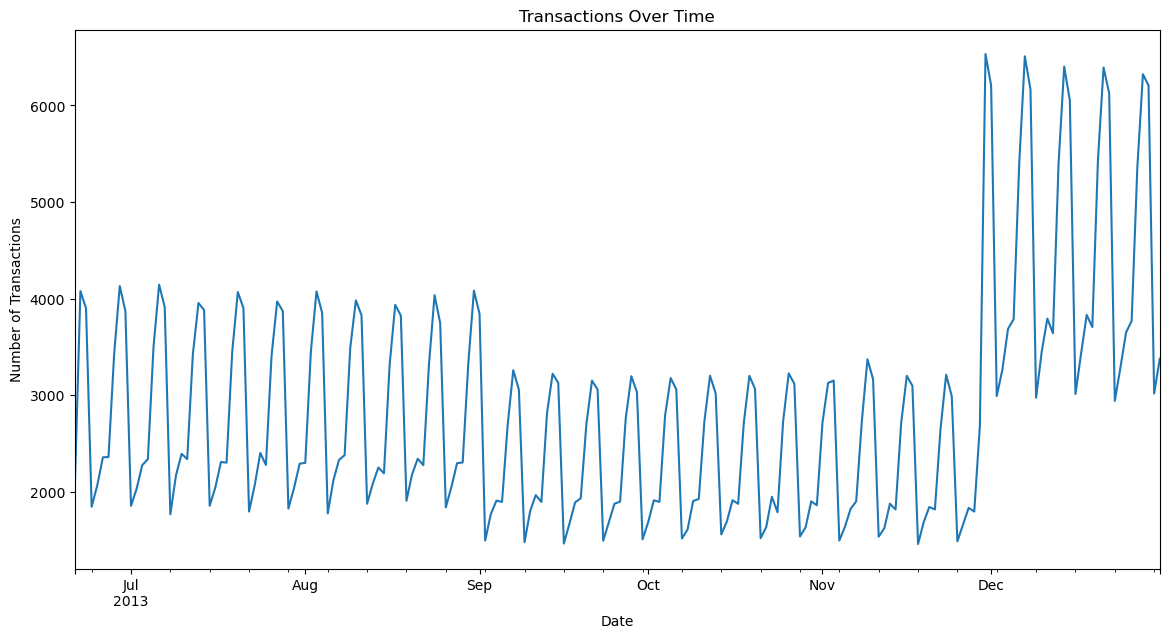

In [74]:
test['datetime'] = pd.to_datetime(test['unix_time'], unit='s')
test.set_index('datetime', inplace=True)
test.resample('D').size().plot(figsize=(14, 7), title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


# **Feature Selection for Train Set**

<Axes: >

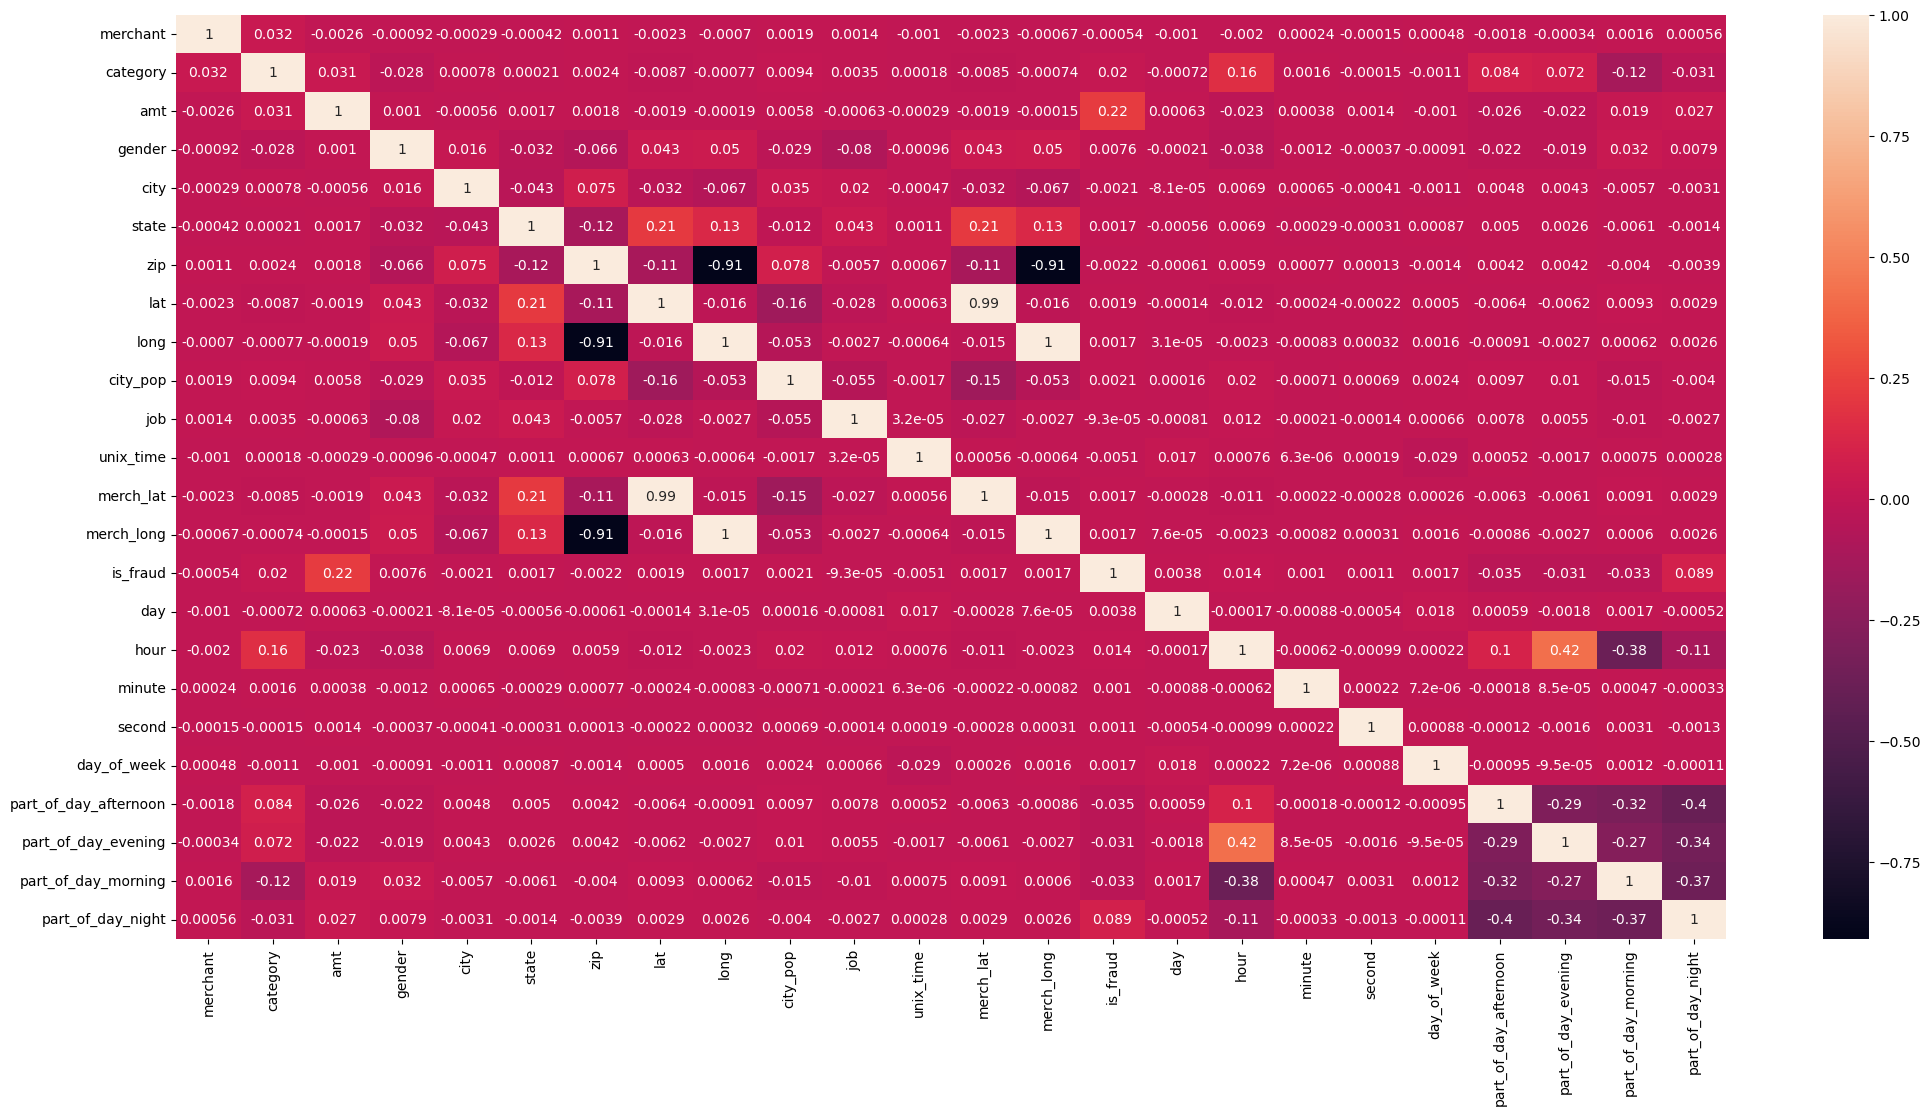

In [75]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(), annot = True)

# **Feature Selection for Test Set**

<Axes: >

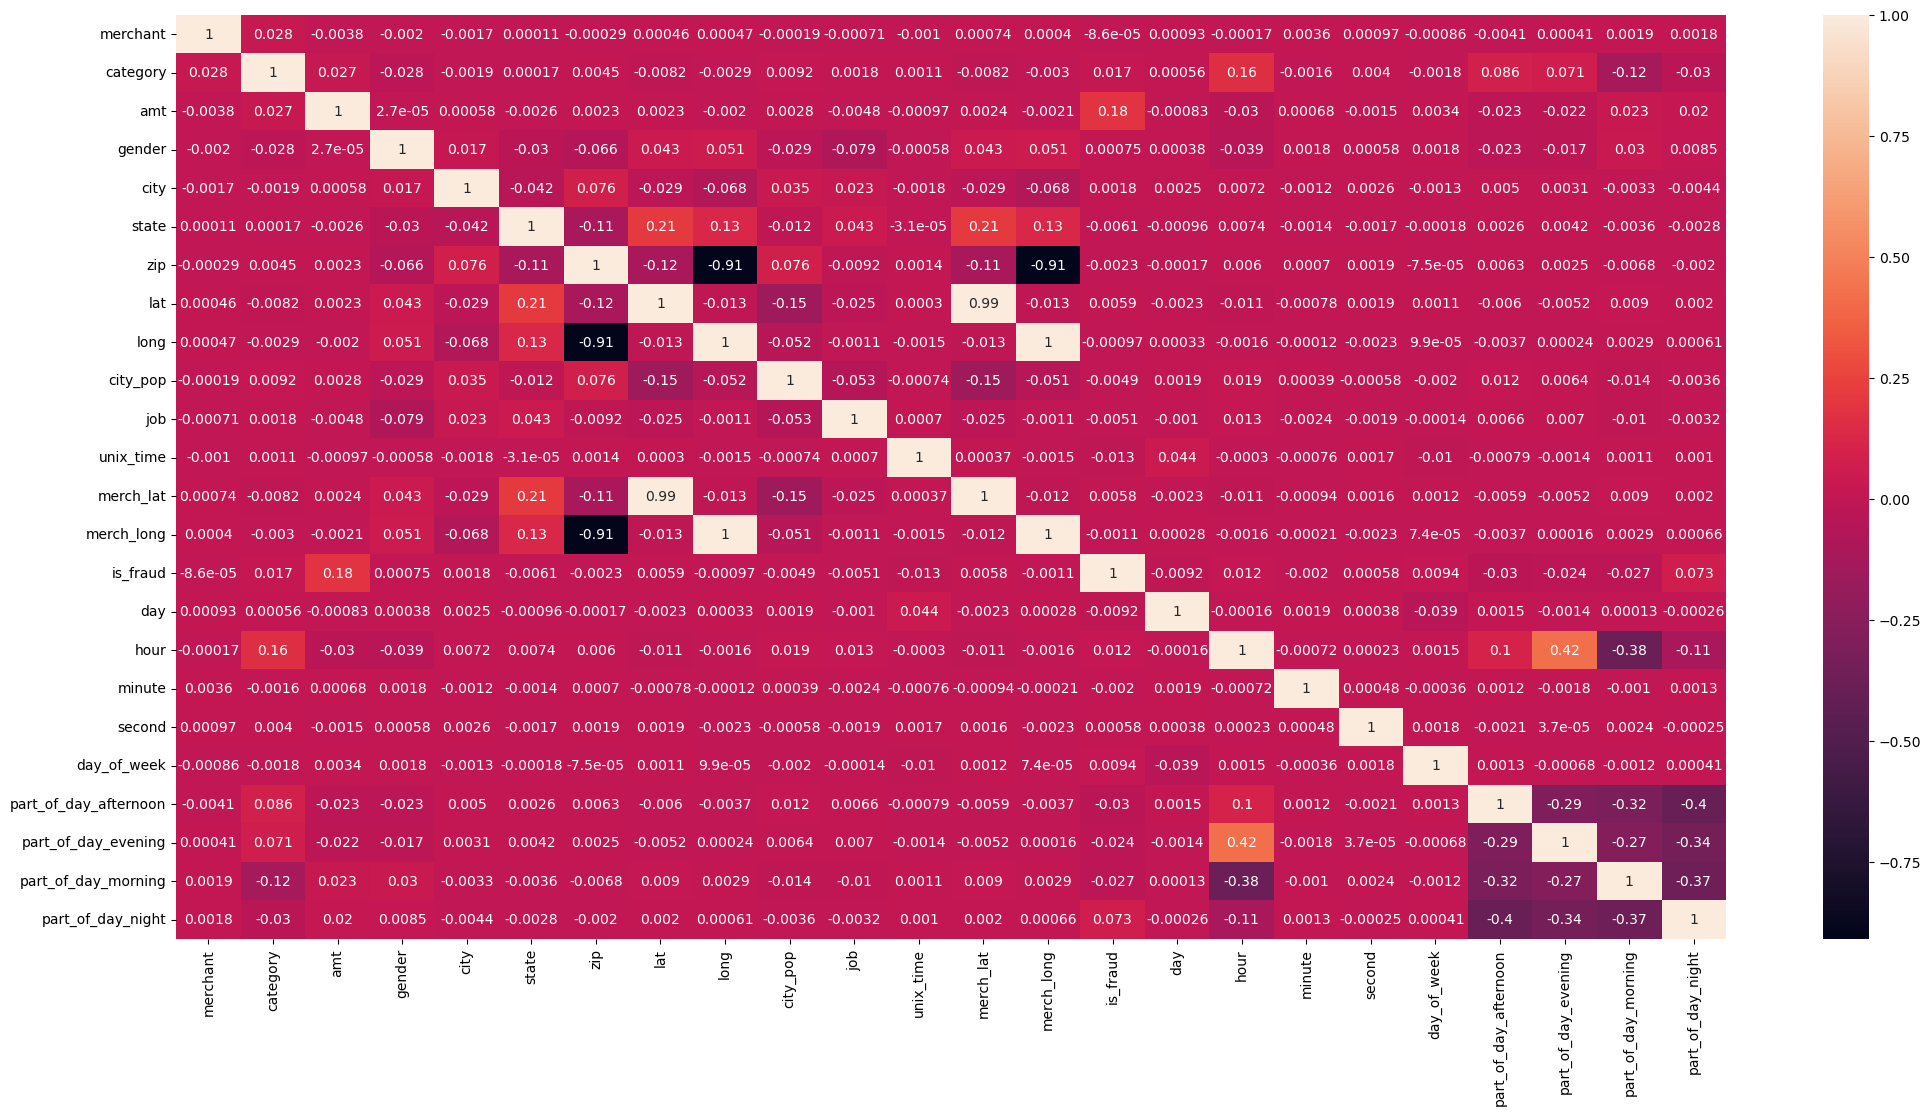

In [76]:
plt.figure(figsize=(25,12))
sns.heatmap(test.corr(), annot = True)

In [77]:
x_train = data.drop(columns = ['is_fraud'])
y_train = data['is_fraud']
x_test = test.drop(columns = ['is_fraud'])
y_test = test['is_fraud']

In [78]:
y_train.isnull().sum()
y_train = y_train.fillna(y_train.mean())
y_train = np.where(y_train > 0.5, 1, 0)

In [79]:
y_test.isnull().sum()
y_test = y_test.fillna(y_test.mean())
y_test = np.where(y_test > 0.5, 1, 0)

# **Logistic Regression:**

In [80]:
Log = LogisticRegression()
Log.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_pred = Log.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred)

0.9961401355721147

In [83]:
r = classification_report(y_test, y_pred)
print(r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



<Axes: >

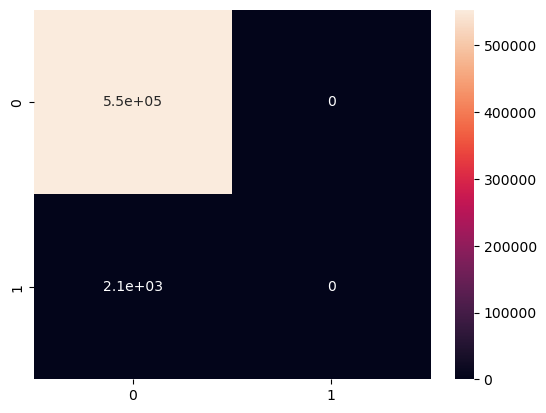

In [84]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot = True)

# **Decision Tree:**

In [85]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = dec.predict(x_test)

In [87]:
accuracy_score(y_test, y_pred)

0.9943748549176832

In [88]:
s = classification_report(y_test, y_pred)
print(s)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.38      0.74      0.50      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.87      0.75    555719
weighted avg       1.00      0.99      1.00    555719



<Axes: >

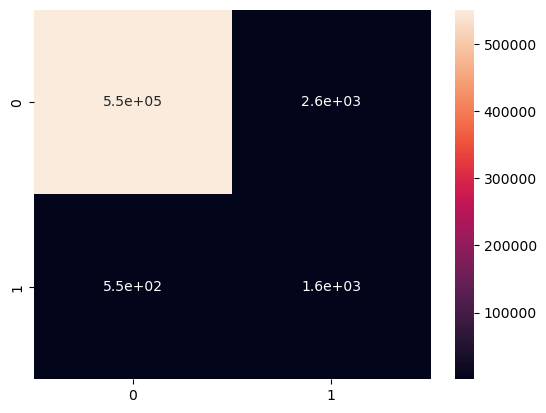

In [89]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot = True)

# **Random Forest:**

In [90]:
ran = RandomForestClassifier()
ran.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
y_pred = ran.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.998159141580547

In [93]:
t = classification_report(y_test, y_pred)
print(t)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.59      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.79      0.85    555719
weighted avg       1.00      1.00      1.00    555719



<Axes: >

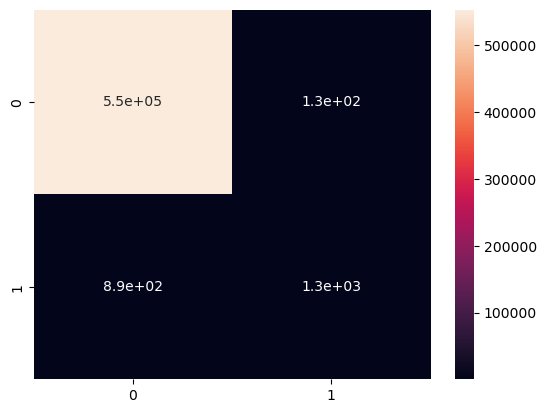

In [94]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot = True)